# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

Откроем файл с данными и создадим датафрейм.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# настроим отображение датафрейма
# поставим вывод всех столбцов
#pd.set_option('display.max_columns')
pd.set_option('display.max_columns', None)
# поставим вывод всех строк
#pd.set_option('display.max_rows')
pd.set_option('display.max_rows', None)

# для отображения в методе describe десятичной системы записи
pd.set_option('float_format', '{:f}'.format)

# прочитаем файл
data = pd.read_csv('C:/Users/Sam/DA/Projects_YandexPracticum/Project3_real_estate/real_estate_data.csv', sep='\t')

Просмотрим первые 20 строк датафрейма.

In [2]:
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.000000,108.000000,2019-03-07T00:00:00,3,2.700000,16.000000,51.000000,8,NaN,False,False,25.000000,NaN,Санкт-Петербург,18863.000000,16028.000000,1.000000,482.000000,2.000000,755.000000,NaN
1,7,3350000.000000,40.400000,2018-12-04T00:00:00,1,NaN,11.000000,18.600000,1,NaN,False,False,11.000000,2.000000,посёлок Шушары,12817.000000,18603.000000,0.000000,NaN,0.000000,NaN,81.000000
2,10,5196000.000000,56.000000,2015-08-20T00:00:00,2,NaN,5.000000,34.300000,4,NaN,False,False,8.300000,0.000000,Санкт-Петербург,21741.000000,13933.000000,1.000000,90.000000,2.000000,574.000000,558.000000
3,0,64900000.000000,159.000000,2015-07-24T00:00:00,3,NaN,14.000000,NaN,9,NaN,False,False,NaN,0.000000,Санкт-Петербург,28098.000000,6800.000000,2.000000,84.000000,3.000000,234.000000,424.000000
4,2,10000000.000000,100.000000,2018-06-19T00:00:00,2,3.030000,14.000000,32.000000,13,NaN,False,False,41.000000,NaN,Санкт-Петербург,31856.000000,8098.000000,2.000000,112.000000,1.000000,48.000000,121.000000
5,10,2890000.000000,30.400000,2018-09-10T00:00:00,1,NaN,12.000000,14.400000,5,NaN,False,False,9.100000,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.000000
6,6,3700000.000000,37.300000,2017-11-02T00:00:00,1,NaN,26.000000,10.600000,6,NaN,False,False,14.400000,1.000000,посёлок Парголово,52996.000000,19143.000000,0.000000,NaN,0.000000,NaN,155.000000
7,5,7915000.000000,71.600000,2019-04-18T00:00:00,2,NaN,24.000000,NaN,22,NaN,False,False,18.900000,2.000000,Санкт-Петербург,23982.000000,11634.000000,0.000000,NaN,0.000000,NaN,NaN
8,20,2900000.000000,33.160000,2018-05-23T00:00:00,1,NaN,27.000000,15.430000,26,NaN,False,False,8.810000,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.000000
9,18,5400000.000000,61.000000,2017-02-26T00:00:00,3,2.500000,9.000000,43.600000,7,NaN,False,False,6.500000,2.000000,Санкт-Петербург,50898.000000,15008.000000,0.000000,NaN,0.000000,NaN,289.000000


Просмотрим общую информацию о датафрейме.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Построим общую гистограмму для датафрейма

array([[<Axes: title={'center': 'total_images'}>,
        <Axes: title={'center': 'last_price'}>,
        <Axes: title={'center': 'total_area'}>,
        <Axes: title={'center': 'rooms'}>],
       [<Axes: title={'center': 'ceiling_height'}>,
        <Axes: title={'center': 'floors_total'}>,
        <Axes: title={'center': 'living_area'}>,
        <Axes: title={'center': 'floor'}>],
       [<Axes: title={'center': 'kitchen_area'}>,
        <Axes: title={'center': 'balcony'}>,
        <Axes: title={'center': 'airports_nearest'}>,
        <Axes: title={'center': 'cityCenters_nearest'}>],
       [<Axes: title={'center': 'parks_around3000'}>,
        <Axes: title={'center': 'parks_nearest'}>,
        <Axes: title={'center': 'ponds_around3000'}>,
        <Axes: title={'center': 'ponds_nearest'}>],
       [<Axes: title={'center': 'days_exposition'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

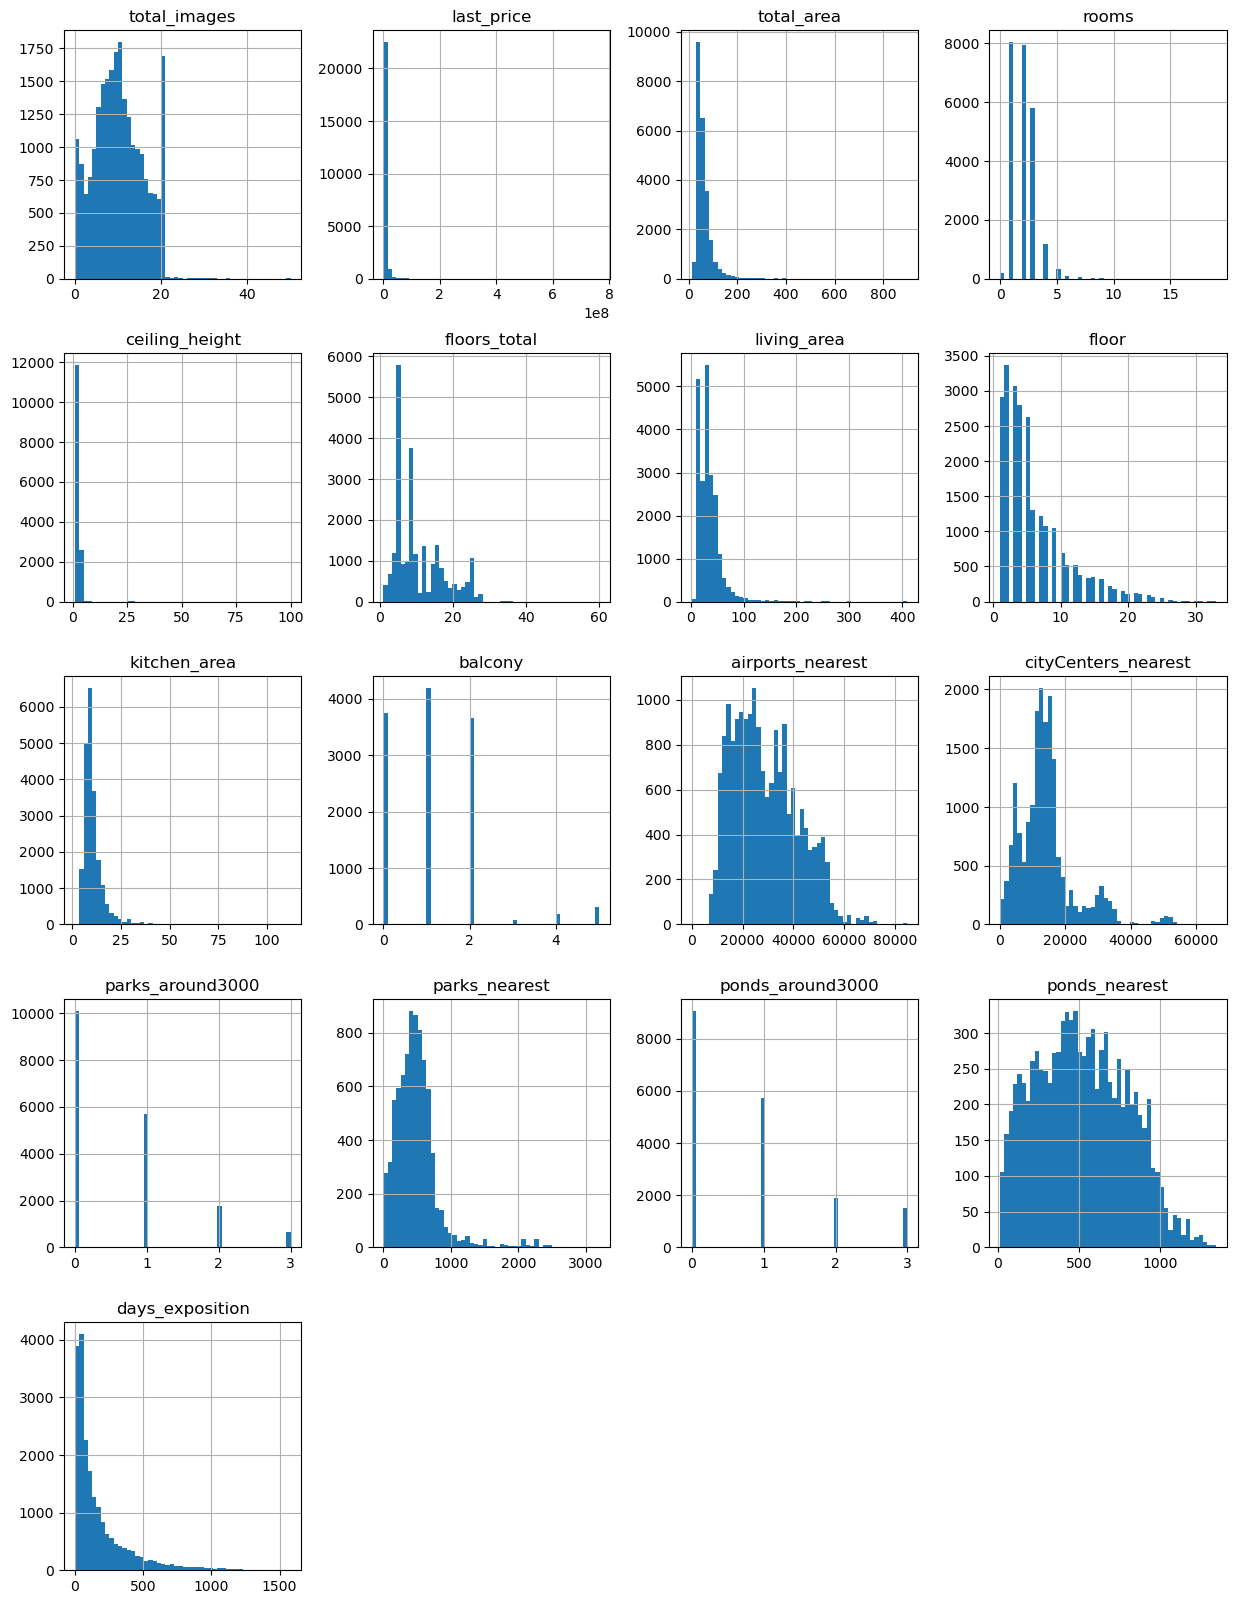

In [4]:
data.hist(bins=50, figsize=(15,20))
#data.hist(figsize=(15,20))

**Вывод:** 
1. После просмотра датафрейма были замечены пропуски в данных. Пропуски надо будет обработать.

2. У некоторых объявлений есть множественные пропуски по картографическим данным. На это стоит обратить внимание в исследовании.

3. Название некоторых стольцов не соответствует "змеиному регистру". Названия столбцов надо исправить.

4. На гистограммах есть выбросы, так как распределение не соответствует нормальному. Надо исследовать и устранить выбросы.

### Предобработка данных

#### Приведение столбцов к единому стилю

Сначала приведем названия столбцов `cityCenters_nearest`, `parks_around3000` и `ponds_around3000` к "змеиному" регистру.

In [5]:
data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest', 'parks_around3000': 'parks_around_3000', 'ponds_around3000': 'ponds_around_3000'})

#проверим переименовывание столбцов
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

#### Обработка пропусков

Посчитаем пропуски в данных.

In [6]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Просмотрим пропуски в `ceiling_height`.

In [7]:
data[data['ceiling_height'].isna()].head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
1,7,3350000.000000,40.400000,2018-12-04T00:00:00,1,NaN,11.000000,18.600000,1,NaN,False,False,11.000000,2.000000,посёлок Шушары,12817.000000,18603.000000,0.000000,NaN,0.000000,NaN,81.000000
2,10,5196000.000000,56.000000,2015-08-20T00:00:00,2,NaN,5.000000,34.300000,4,NaN,False,False,8.300000,0.000000,Санкт-Петербург,21741.000000,13933.000000,1.000000,90.000000,2.000000,574.000000,558.000000
3,0,64900000.000000,159.000000,2015-07-24T00:00:00,3,NaN,14.000000,NaN,9,NaN,False,False,NaN,0.000000,Санкт-Петербург,28098.000000,6800.000000,2.000000,84.000000,3.000000,234.000000,424.000000
5,10,2890000.000000,30.400000,2018-09-10T00:00:00,1,NaN,12.000000,14.400000,5,NaN,False,False,9.100000,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.000000
6,6,3700000.000000,37.300000,2017-11-02T00:00:00,1,NaN,26.000000,10.600000,6,NaN,False,False,14.400000,1.000000,посёлок Парголово,52996.000000,19143.000000,0.000000,NaN,0.000000,NaN,155.000000
7,5,7915000.000000,71.600000,2019-04-18T00:00:00,2,NaN,24.000000,NaN,22,NaN,False,False,18.900000,2.000000,Санкт-Петербург,23982.000000,11634.000000,0.000000,NaN,0.000000,NaN,NaN
8,20,2900000.000000,33.160000,2018-05-23T00:00:00,1,NaN,27.000000,15.430000,26,NaN,False,False,8.810000,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.000000
11,9,3300000.000000,44.000000,2018-08-27T00:00:00,2,NaN,5.000000,31.000000,4,False,False,False,6.000000,1.000000,Ломоносов,48252.000000,51677.000000,0.000000,NaN,0.000000,NaN,7.000000
12,10,3890000.000000,54.000000,2016-06-30T00:00:00,2,NaN,5.000000,30.000000,5,NaN,False,False,9.000000,0.000000,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.000000
14,1,4400000.000000,36.000000,2016-06-23T00:00:00,1,NaN,6.000000,17.000000,1,NaN,False,False,8.000000,0.000000,Пушкин,20782.000000,30759.000000,0.000000,NaN,1.000000,96.000000,203.000000


Закономерности пропусков не видно, для исследования нам не нужна высота потолков в квартире. Узнать высоту потолка в квартире мы не можем, поэтому заполним пропуски медианным значением.

In [8]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

Просмотрим пропуски в `floors_total`.

In [9]:
display(data[data['floors_total'].isna()].head(10))

# просмотрим список уникальных значений
data['floors_total'].sort_values().unique()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
186,12,11640000.000000,65.200000,2018-10-02T00:00:00,2,2.650000,NaN,30.800000,4,NaN,False,False,12.000000,NaN,Санкт-Петербург,39197.000000,12373.000000,1.000000,123.000000,0.000000,NaN,49.000000
237,4,2438033.000000,28.100000,2016-11-23T00:00:00,1,2.650000,NaN,20.750000,1,NaN,False,False,NaN,0.000000,Санкт-Петербург,22041.000000,17369.000000,0.000000,NaN,1.000000,374.000000,251.000000
457,4,9788348.000000,70.800000,2015-08-01T00:00:00,2,2.650000,NaN,38.400000,12,NaN,False,False,10.630000,0.000000,Санкт-Петербург,37364.000000,8322.000000,2.000000,309.000000,2.000000,706.000000,727.000000
671,4,6051191.000000,93.600000,2017-04-06T00:00:00,3,2.650000,NaN,47.100000,8,NaN,False,False,16.800000,0.000000,Санкт-Петербург,22041.000000,17369.000000,0.000000,NaN,1.000000,374.000000,123.000000
1757,5,3600000.000000,39.000000,2017-04-22T00:00:00,1,2.650000,NaN,NaN,9,NaN,False,False,NaN,0.000000,Санкт-Петербург,22735.000000,11618.000000,1.000000,835.000000,1.000000,652.000000,77.000000
1930,1,9750000.000000,66.770000,2016-05-13T00:00:00,2,2.650000,NaN,NaN,4,NaN,False,False,NaN,0.000000,Санкт-Петербург,39886.000000,10660.000000,1.000000,2276.000000,3.000000,244.000000,90.000000
2392,7,5395770.000000,53.000000,2017-06-29T00:00:00,2,2.650000,NaN,29.000000,22,NaN,False,False,9.000000,0.000000,Санкт-Петербург,43074.000000,10820.000000,0.000000,NaN,0.000000,NaN,48.000000
2846,4,2325000.000000,27.800000,2016-09-21T00:00:00,1,2.650000,NaN,19.400000,15,NaN,False,False,NaN,0.000000,Санкт-Петербург,22041.000000,17369.000000,0.000000,NaN,1.000000,374.000000,307.000000
2952,10,6500000.000000,54.300000,2019-04-23T00:00:00,1,2.650000,NaN,22.200000,6,NaN,False,False,12.300000,NaN,Санкт-Петербург,23606.000000,3148.000000,0.000000,NaN,0.000000,NaN,NaN
3031,9,6400000.000000,56.700000,2018-03-27T00:00:00,2,2.650000,NaN,32.000000,12,NaN,False,False,12.000000,NaN,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,231.000000


array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 33., 34., 35., 36., 37., 52., 60., nan])

Закономерности пропусков не видны. Узнать этаж квартиры нельзя. Пропусков мало, на исследование это повлияет мало, поэтому лучше пропуски заполнить 0.

In [10]:
data['floors_total'] = data['floors_total'].fillna(0)

Просмотрим пропуски в `kitchen_area` и `living_area`. 

In [11]:
data[data['kitchen_area'].isna()].head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
3,0,64900000.000000,159.000000,2015-07-24T00:00:00,3,2.650000,14.000000,NaN,9,NaN,False,False,NaN,0.000000,Санкт-Петербург,28098.000000,6800.000000,2.000000,84.000000,3.000000,234.000000,424.000000
30,12,2200000.000000,32.800000,2018-02-19T00:00:00,1,2.650000,9.000000,NaN,2,NaN,False,False,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.000000
37,10,1990000.000000,45.800000,2017-10-28T00:00:00,2,2.500000,5.000000,NaN,1,NaN,False,False,NaN,NaN,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.000000
44,13,5350000.000000,40.000000,2018-11-18T00:00:00,1,2.650000,22.000000,NaN,3,NaN,False,False,NaN,1.000000,Санкт-Петербург,30471.000000,11603.000000,1.000000,620.000000,1.000000,1152.000000,NaN
59,15,6300000.000000,46.500000,2017-03-06T00:00:00,1,2.650000,13.000000,NaN,13,NaN,False,False,NaN,NaN,Санкт-Петербург,11125.000000,14501.000000,0.000000,NaN,0.000000,NaN,336.000000
60,3,2740000.000000,35.000000,2018-01-01T00:00:00,1,2.650000,12.000000,NaN,8,NaN,False,False,NaN,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,11.000000
81,9,10949000.000000,68.000000,2018-12-27T00:00:00,1,2.650000,10.000000,NaN,6,NaN,False,False,NaN,NaN,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,3,4500000.000000,80.500000,2018-01-15T00:00:00,3,2.650000,25.000000,NaN,16,NaN,False,False,NaN,NaN,посёлок Шушары,12430.000000,18217.000000,0.000000,NaN,0.000000,NaN,60.000000
133,12,3150000.000000,31.000000,2018-03-23T00:00:00,1,2.650000,25.000000,NaN,6,NaN,False,False,NaN,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,78.000000
144,1,2450000.000000,27.000000,2017-03-30T00:00:00,0,2.650000,24.000000,15.500000,2,NaN,True,False,NaN,2.000000,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.000000


In [12]:
data[data['living_area'].isna()].head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
3,0,64900000.000000,159.000000,2015-07-24T00:00:00,3,2.650000,14.000000,NaN,9,NaN,False,False,NaN,0.000000,Санкт-Петербург,28098.000000,6800.000000,2.000000,84.000000,3.000000,234.000000,424.000000
7,5,7915000.000000,71.600000,2019-04-18T00:00:00,2,2.650000,24.000000,NaN,22,NaN,False,False,18.900000,2.000000,Санкт-Петербург,23982.000000,11634.000000,0.000000,NaN,0.000000,NaN,NaN
30,12,2200000.000000,32.800000,2018-02-19T00:00:00,1,2.650000,9.000000,NaN,2,NaN,False,False,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.000000
37,10,1990000.000000,45.800000,2017-10-28T00:00:00,2,2.500000,5.000000,NaN,1,NaN,False,False,NaN,NaN,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.000000
44,13,5350000.000000,40.000000,2018-11-18T00:00:00,1,2.650000,22.000000,NaN,3,NaN,False,False,NaN,1.000000,Санкт-Петербург,30471.000000,11603.000000,1.000000,620.000000,1.000000,1152.000000,NaN
59,15,6300000.000000,46.500000,2017-03-06T00:00:00,1,2.650000,13.000000,NaN,13,NaN,False,False,NaN,NaN,Санкт-Петербург,11125.000000,14501.000000,0.000000,NaN,0.000000,NaN,336.000000
60,3,2740000.000000,35.000000,2018-01-01T00:00:00,1,2.650000,12.000000,NaN,8,NaN,False,False,NaN,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,11.000000
81,9,10949000.000000,68.000000,2018-12-27T00:00:00,1,2.650000,10.000000,NaN,6,NaN,False,False,NaN,NaN,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,3,4500000.000000,80.500000,2018-01-15T00:00:00,3,2.650000,25.000000,NaN,16,NaN,False,False,NaN,NaN,посёлок Шушары,12430.000000,18217.000000,0.000000,NaN,0.000000,NaN,60.000000
116,18,10999000.000000,97.200000,2017-11-13T00:00:00,3,2.500000,16.000000,NaN,16,NaN,False,False,18.300000,5.000000,Санкт-Петербург,19426.000000,21138.000000,0.000000,NaN,2.000000,390.000000,394.000000


Скорее всего значения `kitchen_area` и `living_area` не были указаны пользователем, либо произошла ошибка в выгрузке.

Общая площадь квартиры (`total_area`) складывается из жилой площади (`living_area`), площади кухни (`kitchen_area`) и остальной площади квартиры (в датафрейме нет информации об этом).

Теперь посмотрим на соотношение величин в объявлениях, где эти столбцы заполнены.

In [13]:
data[~(data['living_area'].isna()) & ~(data['kitchen_area'].isna())].head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.000000,108.000000,2019-03-07T00:00:00,3,2.700000,16.000000,51.000000,8,NaN,False,False,25.000000,NaN,Санкт-Петербург,18863.000000,16028.000000,1.000000,482.000000,2.000000,755.000000,NaN
1,7,3350000.000000,40.400000,2018-12-04T00:00:00,1,2.650000,11.000000,18.600000,1,NaN,False,False,11.000000,2.000000,посёлок Шушары,12817.000000,18603.000000,0.000000,NaN,0.000000,NaN,81.000000
2,10,5196000.000000,56.000000,2015-08-20T00:00:00,2,2.650000,5.000000,34.300000,4,NaN,False,False,8.300000,0.000000,Санкт-Петербург,21741.000000,13933.000000,1.000000,90.000000,2.000000,574.000000,558.000000
4,2,10000000.000000,100.000000,2018-06-19T00:00:00,2,3.030000,14.000000,32.000000,13,NaN,False,False,41.000000,NaN,Санкт-Петербург,31856.000000,8098.000000,2.000000,112.000000,1.000000,48.000000,121.000000
5,10,2890000.000000,30.400000,2018-09-10T00:00:00,1,2.650000,12.000000,14.400000,5,NaN,False,False,9.100000,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.000000
6,6,3700000.000000,37.300000,2017-11-02T00:00:00,1,2.650000,26.000000,10.600000,6,NaN,False,False,14.400000,1.000000,посёлок Парголово,52996.000000,19143.000000,0.000000,NaN,0.000000,NaN,155.000000
8,20,2900000.000000,33.160000,2018-05-23T00:00:00,1,2.650000,27.000000,15.430000,26,NaN,False,False,8.810000,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.000000
9,18,5400000.000000,61.000000,2017-02-26T00:00:00,3,2.500000,9.000000,43.600000,7,NaN,False,False,6.500000,2.000000,Санкт-Петербург,50898.000000,15008.000000,0.000000,NaN,0.000000,NaN,289.000000
10,5,5050000.000000,39.600000,2017-11-16T00:00:00,1,2.670000,12.000000,20.300000,3,NaN,False,False,8.500000,NaN,Санкт-Петербург,38357.000000,13878.000000,1.000000,310.000000,2.000000,553.000000,137.000000
11,9,3300000.000000,44.000000,2018-08-27T00:00:00,2,2.650000,5.000000,31.000000,4,False,False,False,6.000000,1.000000,Ломоносов,48252.000000,51677.000000,0.000000,NaN,0.000000,NaN,7.000000


Соотноношение `total_area = living_area + kitchen_area + остальная площадь` в объявлениях совершено различно. Можно заполнить  `living_area` как 50% от значений `total_area`, a `kitchen_area` заполнить как 25% от значений `total_area`. Но это приведет к искажению данных.

Процент пропусков в столбцах `kitchen_area` и `living_area` 10% от всего датафрейма. Чтобы не искажать исследование, пропуски исправлять не будем.

In [14]:
# узнаем медиану и среднее значение по Общей площади, Жилой площади и площади кухни. 
data[['total_area', 'living_area', 'kitchen_area']].describe()

,total_area,living_area,kitchen_area
count,23699.000000,21796.000000,21421.000000
mean,60.348651,34.457852,10.569807
std,35.654083,22.030445,5.905438
min,12.000000,2.000000,1.300000
25%,40.000000,18.600000,7.000000
50%,52.000000,30.000000,9.100000
75%,69.900000,42.300000,12.000000
max,900.000000,409.700000,112.000000


In [15]:
# посчитаем процент соотношения жилой площади и площади кухни к общей площади объекта недвижимости
 
#по значениям медианы: 
print(f'По медианному значению Жилая площадь: {30/52:.2%}, Кухня: {9.1/52:.2%}')

#по значениям среднему:
print(f'По среднему значению Жилая площадь: {34.4/60.3:.2%}, Кухня: {10.5/60.3:.2%}')

По медианному значению Жилая площадь: 57.69%, Кухня: 17.50%
По среднему значению Жилая площадь: 57.05%, Кухня: 17.41%


Итак, в объектах недвижимости Жилая площадь составляет 57% от Общей площади, а Площадь кухни - 17% от Общей площади.

Заполним пропуски в таких пропорциях.

In [16]:
def fill_kitchen_area(row):
    """
    проверяет на наличие пустого значения в ячейке kitchen_area.
    пустое значение заполняет соотношением в 0.17 от total_area
    """
    kitchen = row['kitchen_area']
    total = row['total_area']
    
    if np.isnan(kitchen) == True:
        kitchen = total * 0.17
    return kitchen

In [17]:
data['kitchen_area'] = data.apply(fill_kitchen_area, axis=1)

In [18]:
def fill_living_area(row):
    """
    проверяет на наличие пустого значения в ячейке living_area.
    пустое значение заполняет соотношением в 0.57 от total_area
    """ 
    living = row['living_area']
    total = row['total_area']
    
    if np.isnan(living) == True:
        living = total * 0.57
    return living

In [19]:
data['living_area'] = data.apply(fill_living_area, axis=1)

In [20]:
# проверим наличие пропусков в kitchen_area и living_area
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area                0
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Теперь посмотрим пропуски в столбце `is_apartment`. Так как пропусков очень много, посмотрим также уникальные значения в столбце.

In [21]:
display(data[data['is_apartment'].isna()].head(10))

# посмотрим уникальные значения
data['is_apartment'].unique()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.000000,108.000000,2019-03-07T00:00:00,3,2.700000,16.000000,51.000000,8,NaN,False,False,25.000000,NaN,Санкт-Петербург,18863.000000,16028.000000,1.000000,482.000000,2.000000,755.000000,NaN
1,7,3350000.000000,40.400000,2018-12-04T00:00:00,1,2.650000,11.000000,18.600000,1,NaN,False,False,11.000000,2.000000,посёлок Шушары,12817.000000,18603.000000,0.000000,NaN,0.000000,NaN,81.000000
2,10,5196000.000000,56.000000,2015-08-20T00:00:00,2,2.650000,5.000000,34.300000,4,NaN,False,False,8.300000,0.000000,Санкт-Петербург,21741.000000,13933.000000,1.000000,90.000000,2.000000,574.000000,558.000000
3,0,64900000.000000,159.000000,2015-07-24T00:00:00,3,2.650000,14.000000,90.630000,9,NaN,False,False,27.030000,0.000000,Санкт-Петербург,28098.000000,6800.000000,2.000000,84.000000,3.000000,234.000000,424.000000
4,2,10000000.000000,100.000000,2018-06-19T00:00:00,2,3.030000,14.000000,32.000000,13,NaN,False,False,41.000000,NaN,Санкт-Петербург,31856.000000,8098.000000,2.000000,112.000000,1.000000,48.000000,121.000000
5,10,2890000.000000,30.400000,2018-09-10T00:00:00,1,2.650000,12.000000,14.400000,5,NaN,False,False,9.100000,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.000000
6,6,3700000.000000,37.300000,2017-11-02T00:00:00,1,2.650000,26.000000,10.600000,6,NaN,False,False,14.400000,1.000000,посёлок Парголово,52996.000000,19143.000000,0.000000,NaN,0.000000,NaN,155.000000
7,5,7915000.000000,71.600000,2019-04-18T00:00:00,2,2.650000,24.000000,40.812000,22,NaN,False,False,18.900000,2.000000,Санкт-Петербург,23982.000000,11634.000000,0.000000,NaN,0.000000,NaN,NaN
8,20,2900000.000000,33.160000,2018-05-23T00:00:00,1,2.650000,27.000000,15.430000,26,NaN,False,False,8.810000,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.000000
9,18,5400000.000000,61.000000,2017-02-26T00:00:00,3,2.500000,9.000000,43.600000,7,NaN,False,False,6.500000,2.000000,Санкт-Петербург,50898.000000,15008.000000,0.000000,NaN,0.000000,NaN,289.000000


array([nan, False, True], dtype=object)

Столбец `is_apartment` хранит категориальную переменную и показывает является ли квартира апартаментами. Поэтому большое число NaN связано с ошибкой в данных. Заменим все NaN на False.

In [22]:
data['is_apartment'] = data['is_apartment'].fillna(False)

Просмотрим пропуски в `balcony`. Пропусков много, узнаем уникальные значения столбца.

In [23]:
# посмотрим строки с пропусками
display(data[data['balcony'].isna()].head(10))

# теперь просмотрим уникальные значения
data['balcony'].unique()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.000000,108.000000,2019-03-07T00:00:00,3,2.700000,16.000000,51.000000,8,False,False,False,25.000000,NaN,Санкт-Петербург,18863.000000,16028.000000,1.000000,482.000000,2.000000,755.000000,NaN
4,2,10000000.000000,100.000000,2018-06-19T00:00:00,2,3.030000,14.000000,32.000000,13,False,False,False,41.000000,NaN,Санкт-Петербург,31856.000000,8098.000000,2.000000,112.000000,1.000000,48.000000,121.000000
5,10,2890000.000000,30.400000,2018-09-10T00:00:00,1,2.650000,12.000000,14.400000,5,False,False,False,9.100000,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.000000
8,20,2900000.000000,33.160000,2018-05-23T00:00:00,1,2.650000,27.000000,15.430000,26,False,False,False,8.810000,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.000000
10,5,5050000.000000,39.600000,2017-11-16T00:00:00,1,2.670000,12.000000,20.300000,3,False,False,False,8.500000,NaN,Санкт-Петербург,38357.000000,13878.000000,1.000000,310.000000,2.000000,553.000000,137.000000
16,11,6700000.000000,82.000000,2017-11-23T00:00:00,3,3.050000,5.000000,55.600000,1,False,False,False,9.000000,NaN,Санкт-Петербург,22108.000000,10698.000000,3.000000,420.000000,0.000000,NaN,397.000000
19,16,14200000.000000,121.000000,2019-01-09T00:00:00,3,2.750000,16.000000,76.000000,8,False,False,False,12.000000,NaN,Санкт-Петербург,38900.000000,12843.000000,0.000000,NaN,0.000000,NaN,97.000000
23,11,2950000.000000,32.000000,2016-10-29T00:00:00,1,2.600000,9.000000,17.700000,9,False,False,False,6.100000,NaN,Санкт-Петербург,15414.000000,14211.000000,2.000000,517.000000,1.000000,190.000000,615.000000
26,6,4050000.000000,60.000000,2017-04-28T00:00:00,4,2.650000,5.000000,43.000000,4,False,False,False,7.000000,NaN,Санкт-Петербург,11580.000000,10510.000000,0.000000,NaN,1.000000,95.000000,265.000000
30,12,2200000.000000,32.800000,2018-02-19T00:00:00,1,2.650000,9.000000,18.696000,2,False,False,False,5.576000,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.000000


array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

Большое число пропусков связано с ошибкой в данных. Заменим все NaN на 0.

In [24]:
data['balcony'] = data['balcony'].fillna(0)

Теперь обработаем пропуски в `locality_name`.

In [25]:
data[data['locality_name'].isna()].head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
1097,3,8600000.000000,81.700000,2016-04-15T00:00:00,3,3.550000,5.000000,50.800000,2,False,False,False,8.800000,0.000000,NaN,23478.000000,4258.000000,0.000000,NaN,0.000000,NaN,147.000000
2033,6,5398000.000000,80.000000,2017-05-30T00:00:00,3,2.650000,4.000000,42.600000,2,False,False,False,18.600000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.000000
2603,20,3351765.000000,42.700000,2015-09-20T00:00:00,1,2.650000,24.000000,15.600000,3,False,False,False,10.700000,0.000000,NaN,22041.000000,17369.000000,0.000000,NaN,1.000000,374.000000,276.000000
2632,2,5130593.000000,62.400000,2015-10-11T00:00:00,2,2.650000,24.000000,33.100000,21,False,False,False,8.200000,0.000000,NaN,22041.000000,17369.000000,0.000000,NaN,1.000000,374.000000,256.000000
3574,10,4200000.000000,46.500000,2016-05-28T00:00:00,2,2.650000,5.000000,30.800000,5,False,False,False,6.500000,0.000000,NaN,27419.000000,8127.000000,0.000000,NaN,1.000000,603.000000,45.000000
4151,17,17600000.000000,89.500000,2014-12-09T00:00:00,2,3.000000,8.000000,39.620000,7,False,False,False,13.380000,0.000000,NaN,25054.000000,3902.000000,1.000000,485.000000,3.000000,722.000000,869.000000
4189,7,9200000.000000,80.000000,2015-12-10T00:00:00,3,4.000000,4.000000,52.300000,3,False,False,False,10.400000,0.000000,NaN,21774.000000,3039.000000,1.000000,690.000000,1.000000,953.000000,223.000000
4670,1,5500000.000000,83.000000,2015-08-14T00:00:00,3,2.650000,7.000000,47.310000,6,False,False,False,14.110000,0.000000,NaN,26534.000000,5382.000000,1.000000,446.000000,1.000000,376.000000,350.000000
5343,19,13540000.000000,85.500000,2016-01-20T00:00:00,3,2.650000,7.000000,59.100000,5,False,False,False,8.300000,4.000000,NaN,10556.000000,9538.000000,1.000000,67.000000,0.000000,NaN,303.000000
5707,7,3700000.000000,30.000000,2016-04-29T00:00:00,1,2.650000,24.000000,20.000000,23,False,False,False,5.100000,0.000000,NaN,21460.000000,16788.000000,0.000000,NaN,1.000000,170.000000,49.000000


Название название населенного пункта узнать не можем. Пропуски заполним значением *неизвестно*.

In [26]:
data['locality_name'] = data['locality_name'].fillna('неизвестно')

Просмотрим пропуски в `airports_nearest`.

In [27]:
data[data['airports_nearest'].isna()].head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
5,10,2890000.000000,30.400000,2018-09-10T00:00:00,1,2.650000,12.000000,14.400000,5,False,False,False,9.100000,0.000000,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.000000
8,20,2900000.000000,33.160000,2018-05-23T00:00:00,1,2.650000,27.000000,15.430000,26,False,False,False,8.810000,0.000000,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.000000
12,10,3890000.000000,54.000000,2016-06-30T00:00:00,2,2.650000,5.000000,30.000000,5,False,False,False,9.000000,0.000000,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.000000
22,20,5000000.000000,58.000000,2017-04-24T00:00:00,2,2.750000,25.000000,30.000000,15,False,False,False,11.000000,2.000000,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.000000
30,12,2200000.000000,32.800000,2018-02-19T00:00:00,1,2.650000,9.000000,18.696000,2,False,False,False,5.576000,0.000000,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.000000
37,10,1990000.000000,45.800000,2017-10-28T00:00:00,2,2.500000,5.000000,26.106000,1,False,False,False,7.786000,0.000000,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.000000
38,10,3150000.000000,40.000000,2018-03-29T00:00:00,1,2.750000,18.000000,16.300000,9,False,False,False,11.600000,0.000000,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,103.000000
47,17,3600000.000000,56.100000,2018-10-18T00:00:00,3,2.650000,4.000000,42.500000,3,False,False,False,5.700000,1.000000,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,179.000000
60,3,2740000.000000,35.000000,2018-01-01T00:00:00,1,2.650000,12.000000,19.950000,8,False,False,False,5.950000,0.000000,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,11.000000
62,0,4800000.000000,78.600000,2017-09-17T00:00:00,3,2.800000,9.000000,48.800000,5,False,False,False,11.900000,2.000000,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


Видна проблема с геоданными. В столбцах `airports_nearest`, `city_centers_nearest`, `parks_nearest`, `ponds_nearest` отстутствует картографическая информация. Рассмотрим более подробнее.

In [28]:
data[(data['airports_nearest'].isna()) & (data['city_centers_nearest'].isna()) & (data['parks_nearest'].isna()) & (data['ponds_nearest'].isna())].head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
5,10,2890000.000000,30.400000,2018-09-10T00:00:00,1,2.650000,12.000000,14.400000,5,False,False,False,9.100000,0.000000,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.000000
8,20,2900000.000000,33.160000,2018-05-23T00:00:00,1,2.650000,27.000000,15.430000,26,False,False,False,8.810000,0.000000,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.000000
12,10,3890000.000000,54.000000,2016-06-30T00:00:00,2,2.650000,5.000000,30.000000,5,False,False,False,9.000000,0.000000,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.000000
22,20,5000000.000000,58.000000,2017-04-24T00:00:00,2,2.750000,25.000000,30.000000,15,False,False,False,11.000000,2.000000,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.000000
30,12,2200000.000000,32.800000,2018-02-19T00:00:00,1,2.650000,9.000000,18.696000,2,False,False,False,5.576000,0.000000,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.000000
37,10,1990000.000000,45.800000,2017-10-28T00:00:00,2,2.500000,5.000000,26.106000,1,False,False,False,7.786000,0.000000,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.000000
38,10,3150000.000000,40.000000,2018-03-29T00:00:00,1,2.750000,18.000000,16.300000,9,False,False,False,11.600000,0.000000,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,103.000000
47,17,3600000.000000,56.100000,2018-10-18T00:00:00,3,2.650000,4.000000,42.500000,3,False,False,False,5.700000,1.000000,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,179.000000
60,3,2740000.000000,35.000000,2018-01-01T00:00:00,1,2.650000,12.000000,19.950000,8,False,False,False,5.950000,0.000000,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,11.000000
62,0,4800000.000000,78.600000,2017-09-17T00:00:00,3,2.800000,9.000000,48.800000,5,False,False,False,11.900000,2.000000,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


Проблема видна с добавлением картографических данных. Необходимо передать эту информацию разработчикам. 

Столбцы `airports_nearest`, `city_centers_nearest`, `parks_nearest`, `ponds_nearest`, которые содержат пропуски, исправлять не будем.

Просмотрим пропуски в `parks_around_3000` и `ponds_around_3000`. Проверим встречаются ли эти пропуски в столбцах с заполненными  с картографическими данными. Возможно стоит пропуски заполнить 0, так как вместо 0 стоит NaN.

In [29]:
data[((data['parks_around_3000'].isna()) & (~(data['airports_nearest'].isna()))) 
     | ((data['ponds_around_3000'].isna()) & (~(data['airports_nearest'].isna())))].head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition


Таких строк нет. Значит заполнить 0 эти столбцы не стоит. В них тоже ошибка в получении данных. Пропуски исправлять не будем.

Просмотрим пропуски в `days_exposition`.

In [30]:
data[data['days_exposition'].isna()].head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.000000,108.000000,2019-03-07T00:00:00,3,2.700000,16.000000,51.000000,8,False,False,False,25.000000,0.000000,Санкт-Петербург,18863.000000,16028.000000,1.000000,482.000000,2.000000,755.000000,NaN
7,5,7915000.000000,71.600000,2019-04-18T00:00:00,2,2.650000,24.000000,40.812000,22,False,False,False,18.900000,2.000000,Санкт-Петербург,23982.000000,11634.000000,0.000000,NaN,0.000000,NaN,NaN
44,13,5350000.000000,40.000000,2018-11-18T00:00:00,1,2.650000,22.000000,22.800000,3,False,False,False,6.800000,1.000000,Санкт-Петербург,30471.000000,11603.000000,1.000000,620.000000,1.000000,1152.000000,NaN
45,17,5200000.000000,50.600000,2018-12-02T00:00:00,2,2.650000,9.000000,30.300000,7,False,False,False,7.000000,0.000000,Санкт-Петербург,30011.000000,12872.000000,0.000000,NaN,0.000000,NaN,NaN
46,17,6600000.000000,52.100000,2019-01-31T00:00:00,2,2.600000,24.000000,29.700000,9,False,False,False,8.300000,2.000000,Санкт-Петербург,15114.000000,12702.000000,0.000000,NaN,0.000000,NaN,NaN
49,1,3050000.000000,30.800000,2018-11-22T00:00:00,1,2.500000,9.000000,18.000000,7,False,False,False,6.000000,0.000000,Санкт-Петербург,45341.000000,16603.000000,1.000000,675.000000,0.000000,NaN,NaN
52,20,11795000.000000,136.000000,2017-09-22T00:00:00,6,3.000000,2.000000,94.000000,2,False,False,False,11.000000,1.000000,Санкт-Петербург,16510.000000,6582.000000,1.000000,526.000000,0.000000,NaN,NaN
71,20,4850000.000000,57.500000,2019-03-27T00:00:00,3,2.500000,9.000000,39.000000,8,False,False,False,6.200000,0.000000,Санкт-Петербург,33623.000000,12267.000000,1.000000,334.000000,1.000000,333.000000,NaN
81,9,10949000.000000,68.000000,2018-12-27T00:00:00,1,2.650000,10.000000,38.760000,6,False,False,False,11.560000,0.000000,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,11,2400000.000000,43.900000,2019-03-13T00:00:00,2,2.650000,2.000000,27.460000,1,False,False,False,5.200000,0.000000,Кировск,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Не видно закономерности пропусков в столбце `days_exposition`. Возможно это ошибка выгрузки данных, стоит обратиться к разработчикам. Пропуски исправлять не будем.

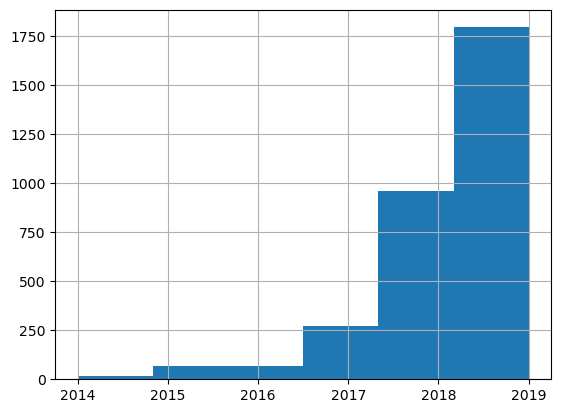

In [31]:
# посмотрим на гистограмме распределение по годам пропусков по days_exposition
# так как столбец year создается в пункте 3, скопирует датафрейм data в df, создадим столбец year
# используем датафрейм df только для поиска закономерности
df = data
df['year'] = pd.DatetimeIndex(df['first_day_exposition']).year
df.loc[df['days_exposition'].isna(),'year'].hist(bins=6)
plt.show()

Видно, что количество пропусков в по столбцу days_exposition резко растет с 2017 года и достигает максимум в 2019.

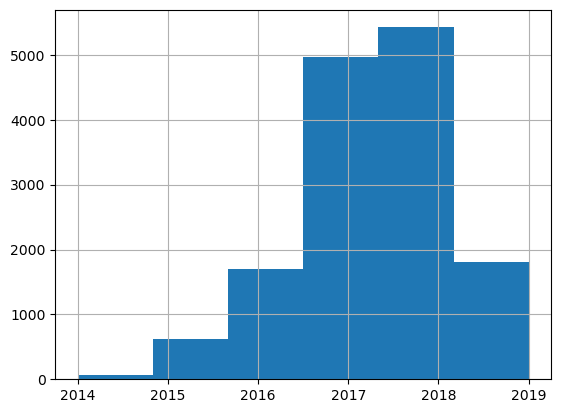

In [32]:
# посмотрим на гистограмме распределения по годам пропусков по ponds_nearest
df.loc[df['ponds_nearest'].isna(),'year'].hist(bins=6)
plt.show()

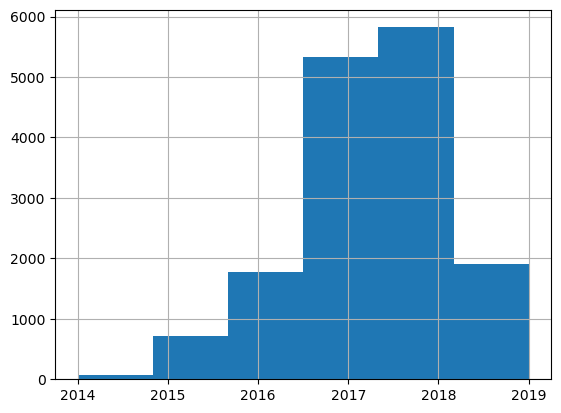

In [33]:
# посмотрим на гистограмме распределения по годам пропусков по parks_nearest
df.loc[df['parks_nearest'].isna(),'year'].hist(bins=6)
plt.show()

Видно, что максимум пропусков по геоданным в 2017 и 2018 годах.

<Axes: >

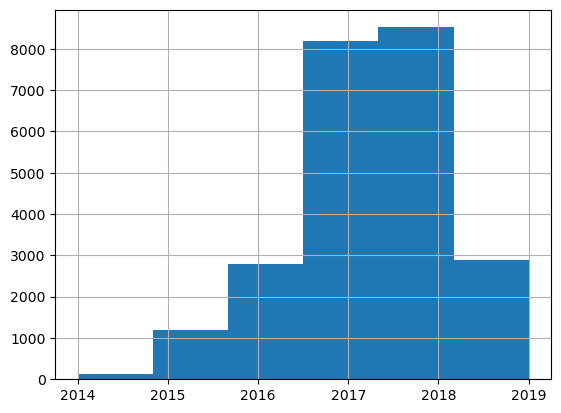

In [34]:
# посмотрим на гистограмме распределения всех объявлений по годам
df['year'].hist(bins=6)
#plt.show()

Из гистограммы распределения всех объявлений по годам видно, что максимум объявлений в 2017 и 2018 года.

График количества объявлений по годам схож с графиками пропусков геоданных.

Можно предположить, с увеличением количества объявлений, увеличилось и количество ошибок с получением геоданных.

Посмотрим на то,  в каких столбцах пропуски исправлены в датафрейме.

In [35]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
year                        0
dtype: int64

Пропуски были исправлены в тех столбцах, где это было возможно и не повлияет на исследование. В остальных столбцах - NaN были оставлены.

Действительно, есть проблема с выгрузкой картографических данных.

#### Изменение типов данных

Преобразуем тип данных в столбцах.

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23699 non-null  float64
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23699 non-null  object 
 15  airports_nearest   

In [37]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,year
0,20,13000000.000000,108.000000,2019-03-07T00:00:00,3,2.700000,16.000000,51.000000,8,False,False,False,25.000000,0.000000,Санкт-Петербург,18863.000000,16028.000000,1.000000,482.000000,2.000000,755.000000,NaN,2019
1,7,3350000.000000,40.400000,2018-12-04T00:00:00,1,2.650000,11.000000,18.600000,1,False,False,False,11.000000,2.000000,посёлок Шушары,12817.000000,18603.000000,0.000000,NaN,0.000000,NaN,81.000000,2018
2,10,5196000.000000,56.000000,2015-08-20T00:00:00,2,2.650000,5.000000,34.300000,4,False,False,False,8.300000,0.000000,Санкт-Петербург,21741.000000,13933.000000,1.000000,90.000000,2.000000,574.000000,558.000000,2015
3,0,64900000.000000,159.000000,2015-07-24T00:00:00,3,2.650000,14.000000,90.630000,9,False,False,False,27.030000,0.000000,Санкт-Петербург,28098.000000,6800.000000,2.000000,84.000000,3.000000,234.000000,424.000000,2015
4,2,10000000.000000,100.000000,2018-06-19T00:00:00,2,3.030000,14.000000,32.000000,13,False,False,False,41.000000,0.000000,Санкт-Петербург,31856.000000,8098.000000,2.000000,112.000000,1.000000,48.000000,121.000000,2018


Исправим тип столбцов `last_price` и `floors_total` с float64 на int64, чтобы величины были целочисленными. 

А тип столбца `first_day_exposition` преобразуем с object на datetime64 для того, чтобы работать с датой.

In [38]:
# переводим в int
data['last_price'] = data['last_price'].astype(int)
data['floors_total'] = data['floors_total'].astype(int)
data['days_exposition'] = np.floor(data['days_exposition'])

# переведем в тип для работы с датой и временем
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

Проверим изменения.

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int32         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  int32         
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

In [40]:
# просмотрим уникальные значения
display(data['balcony'].sort_values().unique())

# преобразуем столбец balcony в int
data['balcony'] = data['balcony'].astype(int)

# проверим преобразование
data.info()

array([0., 1., 2., 3., 4., 5.])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int32         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  int32         
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

#### Обработка неявных дубликатов

Проверим столбец `locality_name` на неявные дубликаты.

In [41]:
# преобразуем значения к нижнему регистру
#data['locality_name'] = data['locality_name'].str.lower()

# посчитаем количество уникальных значений
display(len(data['locality_name'].sort_values().unique()))

# просмотрим уникальные значения
data['locality_name'].sort_values().unique()

365

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

In [42]:
def locality_name(name):

    # принимает значение ячейки, проверяет наличие в ячейке слов из списка на замену
    # и заменяет слова в ячейке на слово на замену

    # список на замену
    change_list = ['городской поселок', 'городской посёлок', 'поселок городского типа', 
                   'поселок станции', 'посёлок', 'посёлок городского типа', 'посёлок станции', 
                   'поселок станции', 'поселок городского типа',
                   'посёлок при железнодорожной станции', 'поселок при железнодорожной станции', 
                   'коттеджный поселок', 'коттеджный посёлок']
    # слово на замену
    change = 'поселок'

    for value in change_list:
         if value in change_list:
           name = name.replace(value, change)

    return name

In [43]:
# устраняю дубликаты в locality_name
data['locality_name'] = data['locality_name'].apply(locality_name)

In [44]:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'деревня Агалатово', 'деревня Аро', 'деревня Батово',
       'деревня Бегуницы', 'деревня Белогорка', 'деревня Большая Вруда',
       'деревня Большая Пустомержа', 'деревня Большие Колпаны',
       'деревня Большое Рейзино', 'деревня Большой Сабск', 'деревня Бор',
       'деревня Борисова Грива', 'деревня Ваганово', 'деревня Вартемяги',
       'деревня Вахнова Кара', 'деревня Выскатка

Проверяем, что неявные дубликаты изменены.

In [45]:
display(len(data['locality_name'].sort_values().unique()))

data['locality_name'].sort_values().unique()

319

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'деревня Агалатово', 'деревня Аро', 'деревня Батово',
       'деревня Бегуницы', 'деревня Белогорка', 'деревня Большая Вруда',
       'деревня Большая Пустомержа', 'деревня Большие Колпаны',
       'деревня Большое Рейзино', 'деревня Большой Сабск', 'деревня Бор',
       'деревня Борисова Грива', 'деревня Ваганово', 'деревня Вартемяги',
       'деревня Вахнова Кара', 'деревня Выскатка

Число уникальных значений уменьшилось `locality_name` с 365 до 319. Дубликаты убрали из столбца.

#### Проверка на наличие строк-дубликатов

Посчитаем количество строк-дубликатов.

In [46]:
data.duplicated().sum()

0

Таких строк нет.

#### Обработка аномальных значений

Просмотрим столбцы на редкие значения и аномалии с помощью просмотра уникальных значений, описания данных методом `describe()` и построения диаграммы размаха методом `boxplot()`.

**Аномальные значения удалим в конце обработки аномальных значений.**

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int32         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  int32         
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

In [48]:
# просмотрим уникальные значения total_images
data['total_images'].sort_values().unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 35,
       37, 39, 42, 50], dtype=int64)

In [49]:
# узнаем количество объявлений с фотографиями > 30
len(data[data['total_images'] > 30])

14

In [50]:
# просмотрим описание total_images 
data['total_images'].describe()

count   23699.000000
mean        9.858475
std         5.682529
min         0.000000
25%         6.000000
50%         9.000000
75%        14.000000
max        50.000000
Name: total_images, dtype: float64

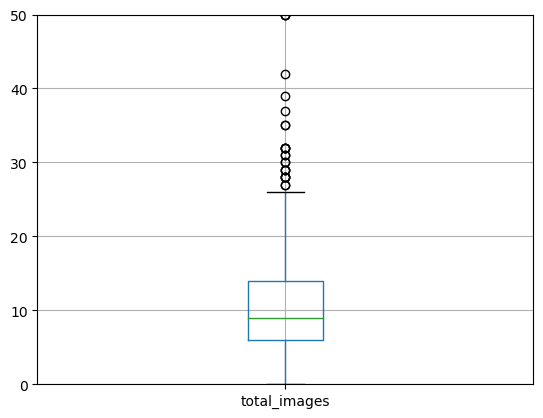

In [51]:
# построим диаграмму размаха
data.boxplot('total_images')
plt.ylim(0, 50)
plt.show()

Проблемы в уникальных значениях не видны. Число фотографий в объявлении > 30 достаточно много, и таких обявлений всего 14.
Выбросами будем считать значения > 30. Удалим их из датафрейма.

In [52]:
# удаляем выбросы по total_images
data = data[data['total_images'] <= 30]

In [53]:
# просмотрим уникальные значения last_price
data['last_price'].sort_values().unique()

array([    12190,    430000,    440000, ..., 401300000, 420000000,
       763000000])

In [54]:
# просмотрим аномальное значение в 12190
data.query('last_price == 12190')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,year
8793,7,12190,109.000000,2019-03-20,2,2.750000,25,32.000000,25,False,False,False,40.500000,0,Санкт-Петербург,36421.000000,9176.000000,1.000000,805.000000,0.000000,NaN,8.000000,2019


Дней показа всего 8. Либо правильная цена = 12190000, либо это аномалия. Удалим объявление.

In [55]:
data = data[data['last_price'] != 12190]

In [56]:
# узнаем количество объявлений с ценой > 100 млн
len(data[data['last_price'] > 100000000])

37

In [57]:
# узнаем количество объявлений с ценой < 600 тыс
len(data[data['last_price'] < 600000])

32

In [58]:
# просмотрим описание last_price
data['last_price'].describe()

count       23684.000000
mean      6538755.030696
std      10888969.666671
min        430000.000000
25%       3400000.000000
50%       4650000.000000
75%       6790000.000000
max     763000000.000000
Name: last_price, dtype: float64

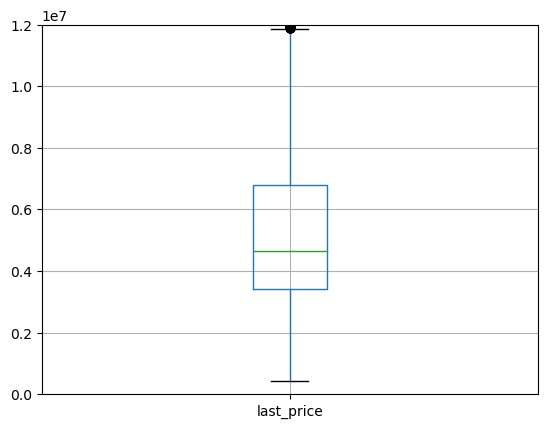

In [59]:
# построим диаграмму размаха
data.boxplot('last_price')
plt.ylim(0, 12000000)
plt.show()

Удалим из датафрейма слишком дорогие и дешевые квартиры.
Выбросами будем считать значения > 100 млн и < 600 тыс.

In [60]:
# удаляем выбросы по last_price
data = data[(data['last_price'] <= 100000000) & (data['last_price'] >= 600000)]

In [61]:
# просмотрим уникальные значения total_area
data['total_area'].sort_values().unique()

array([ 12. ,  13. ,  13.2, ..., 507. , 517. , 590. ])

In [62]:
# узнаем количество объявлений с площадью > 400
len(data[data['total_area'] > 400])

14

In [63]:
# узнаем количество объявлений с площадью < 15
len(data[data['total_area'] < 15])

6

In [64]:
# просмотрим описание total_area
data['total_area'].describe()

count   23615.000000
mean       59.933677
std        33.476143
min        12.000000
25%        40.000000
50%        52.000000
75%        69.600000
max       590.000000
Name: total_area, dtype: float64

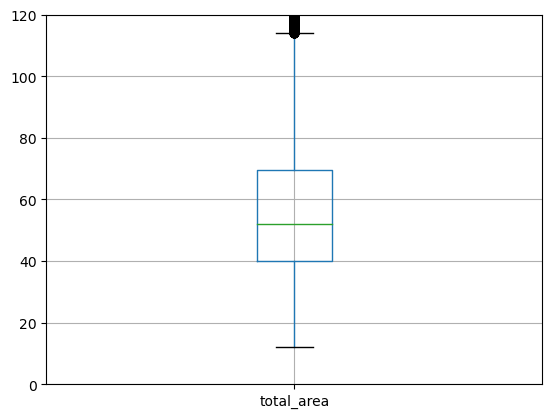

In [65]:
# построим диаграмму размаха
data.boxplot('total_area')
plt.ylim(0,120)
plt.show()

Удалим из датафрейма слишком большие и малые квартиры по площади.
Выбросами будем считать значения > 400 и < 15. Удалим их из датафрейма.

In [66]:
# удаляем выбросы по total_area
data = data[(data['total_area'] >= 15) & (data['total_area'] <= 400)]

In [67]:
# просмотрим уникальные значения даты
data['first_day_exposition'].sort_values().unique()

array(['2014-11-27T00:00:00.000000000', '2014-11-29T00:00:00.000000000',
       '2014-12-04T00:00:00.000000000', ...,
       '2019-05-01T00:00:00.000000000', '2019-05-02T00:00:00.000000000',
       '2019-05-03T00:00:00.000000000'], dtype='datetime64[ns]')

Объявления в датафрейме за период с 2014 по 2019 год. Обработаем дату не будем.

In [68]:
# просмотрим уникальные значения rooms
data['rooms'].sort_values().unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 14, 16, 19],
      dtype=int64)

In [69]:
# узнаем количество объявлений с комнатами > 10
len(data[data['rooms'] > 10])

6

In [70]:
# узнаем количество объявлений с комнатами = 0
display(len(data[data['rooms'] == 0]))

# постотрим на квартиры с комнатами = 0
data[data['rooms'] == 0].head()

197

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,year
144,1,2450000,27.000000,2017-03-30,0,2.650000,24,15.500000,2,False,True,False,4.590000,2,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.000000,2017
349,4,2320000,25.000000,2017-09-27,0,2.650000,14,17.000000,1,False,False,True,4.250000,0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.000000,2017
440,8,2480000,27.110000,2018-03-12,0,2.650000,17,24.750000,4,False,True,False,4.608700,2,Санкт-Петербург,38171.000000,15015.000000,0.000000,NaN,2.000000,982.000000,64.000000,2018
508,0,3375000,34.400000,2017-03-28,0,2.650000,26,24.300000,19,False,False,True,5.848000,1,поселок Парголово,53115.000000,19292.000000,0.000000,NaN,1.000000,593.000000,430.000000,2017
608,2,1850000,25.000000,2019-02-20,0,2.650000,10,14.250000,7,False,True,False,4.250000,0,поселок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.000000,2019


В квартирах с 0 комнат есть в ошибка в данных. Исправим на 1 комнату.

In [71]:
data.loc[data['rooms'] == 0, 'rooms'] = 1

In [72]:
# проверим
display(len(data[data['rooms'] == 0]))

0

In [73]:
# построим описание rooms
data['rooms'].describe()

count   23595.000000
mean        2.072261
std         1.050956
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        19.000000
Name: rooms, dtype: float64

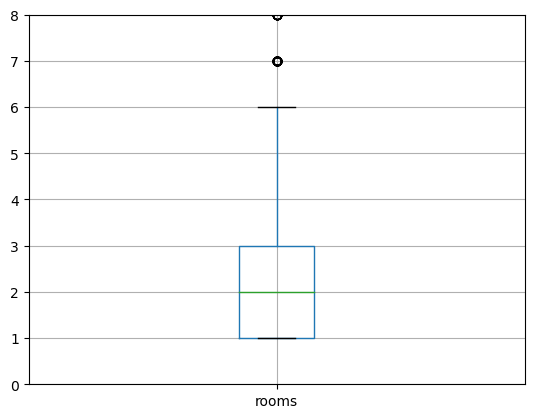

In [74]:
# построим диаграмму размаха
data.boxplot('rooms')
plt.ylim(0,8)
plt.show()

Проблемы это квартиры с большим количеством комнат.
Выбросами будем считать значения > 10. Удалим их из датафрейма.

In [75]:
# удаляем выбросы по rooms
data = data[data['rooms'] <= 10]

In [76]:
# просмотрим уникальные значения ceiling_height
#display(len(data['ceiling_height'].sort_values().unique()))
data['ceiling_height'].sort_values().unique()

array([  1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,   2.34,
         2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,
         2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,
         2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,
         2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,
         2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,
         2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,
         2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   2.99,
         3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,   3.07,
         3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,
         3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,
         3.25,   3.26,   3.27,   3.28,   3.29,   3.3 ,   3.31,   3.32,
         3.33,   3.34,   3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,
         3.42,   3.44,   3.45,   3.46,   3.47,   3.48,   3.49,   3.5 ,
      

Есть ошибка ввода в значениях 20, 22.6, 24, 25, 26, 27, 27.5, 32, 100. Исправим их в датафрейме, поделив их на 10. 

In [77]:
# исправим значения 20, 22.6, 24, 25, 26, 27, 27.5, 32, 100, поделив их на 10.

def change_ceiling(value):
    # делит значение ячейки на 10, если значение входит в список
    
    list = [20, 22.6, 24, 25, 26, 27, 27.5, 32, 100]
    
    if value in list:
        return value / 10
    
    return value

In [78]:
data['ceiling_height'] = data['ceiling_height'].apply(change_ceiling)

In [79]:
#display(len(data['ceiling_height'].sort_values().unique()))
data['ceiling_height'].sort_values().unique()

array([ 1.  ,  1.2 ,  1.75,  2.  ,  2.2 ,  2.25,  2.26,  2.3 ,  2.34,
        2.4 ,  2.45,  2.46,  2.47,  2.48,  2.49,  2.5 ,  2.51,  2.52,
        2.53,  2.54,  2.55,  2.56,  2.57,  2.58,  2.59,  2.6 ,  2.61,
        2.62,  2.63,  2.64,  2.65,  2.66,  2.67,  2.68,  2.69,  2.7 ,
        2.71,  2.72,  2.73,  2.74,  2.75,  2.76,  2.77,  2.78,  2.79,
        2.8 ,  2.81,  2.82,  2.83,  2.84,  2.85,  2.86,  2.87,  2.88,
        2.89,  2.9 ,  2.91,  2.92,  2.93,  2.94,  2.95,  2.96,  2.97,
        2.98,  2.99,  3.  ,  3.01,  3.02,  3.03,  3.04,  3.05,  3.06,
        3.07,  3.08,  3.09,  3.1 ,  3.11,  3.12,  3.13,  3.14,  3.15,
        3.16,  3.17,  3.18,  3.2 ,  3.21,  3.22,  3.23,  3.24,  3.25,
        3.26,  3.27,  3.28,  3.29,  3.3 ,  3.31,  3.32,  3.33,  3.34,
        3.35,  3.36,  3.37,  3.38,  3.39,  3.4 ,  3.42,  3.44,  3.45,
        3.46,  3.47,  3.48,  3.49,  3.5 ,  3.51,  3.52,  3.53,  3.54,
        3.55,  3.56,  3.57,  3.58,  3.59,  3.6 ,  3.62,  3.63,  3.65,
        3.66,  3.67,

In [80]:
# узнаем количество объявлений с высотой потолка > 8
len(data[data['ceiling_height'] > 8])

4

In [81]:
# узнаем количество объявлений с высотой потолка < 2
len(data[data['ceiling_height'] < 2])

3

In [82]:
data['ceiling_height'].describe()

count   23589.000000
mean        2.697119
std         0.248693
min         1.000000
25%         2.600000
50%         2.650000
75%         2.700000
max        14.000000
Name: ceiling_height, dtype: float64

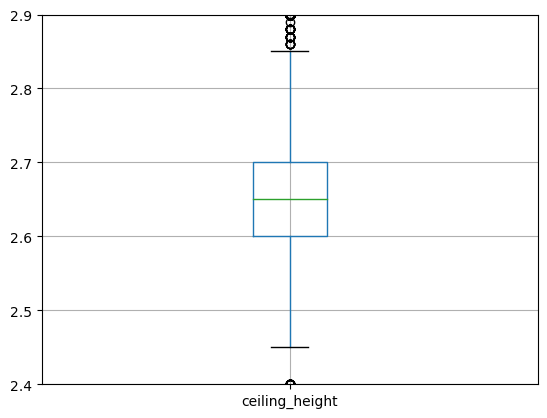

In [83]:
data.boxplot('ceiling_height')
plt.ylim(2.4, 2.9)
plt.show()

Удалим из датафрейма квартиры со слишком высоким и низким потолком.
Выбросами будут значения < 2 и > 8. Удалим их из датафрейма.

In [84]:
# удаляем выбросы по ceiling_height
data = data[(data['ceiling_height'] >= 2) & (data['ceiling_height'] <= 8)]

In [85]:
# просмотрим уникальные значения floors_total
data['floors_total'].sort_values().unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 33, 34, 35, 36,
       52, 60])

In [86]:
len(data[data['floors_total'] == 0])

86

In [87]:
data[data['floors_total'] == 0].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,year
186,12,11640000,65.200000,2018-10-02,2,2.650000,0,30.800000,4,False,False,False,12.000000,0,Санкт-Петербург,39197.000000,12373.000000,1.000000,123.000000,0.000000,NaN,49.000000,2018
237,4,2438033,28.100000,2016-11-23,1,2.650000,0,20.750000,1,False,False,False,4.777000,0,Санкт-Петербург,22041.000000,17369.000000,0.000000,NaN,1.000000,374.000000,251.000000,2016
457,4,9788348,70.800000,2015-08-01,2,2.650000,0,38.400000,12,False,False,False,10.630000,0,Санкт-Петербург,37364.000000,8322.000000,2.000000,309.000000,2.000000,706.000000,727.000000,2015
671,4,6051191,93.600000,2017-04-06,3,2.650000,0,47.100000,8,False,False,False,16.800000,0,Санкт-Петербург,22041.000000,17369.000000,0.000000,NaN,1.000000,374.000000,123.000000,2017
1757,5,3600000,39.000000,2017-04-22,1,2.650000,0,22.230000,9,False,False,False,6.630000,0,Санкт-Петербург,22735.000000,11618.000000,1.000000,835.000000,1.000000,652.000000,77.000000,2017


Узнать этаж мы не можем. Удалим аномальное значение 0.

In [88]:
data = data[data['floors_total'] != 0]

In [89]:
# узнаем количество объявлений с общим количеством этажей > 36
len(data[data['floors_total'] > 36])

2

In [90]:
data['floors_total'].describe()

count   23496.000000
mean       10.690628
std         6.595278
min         1.000000
25%         5.000000
50%         9.000000
75%        16.000000
max        60.000000
Name: floors_total, dtype: float64

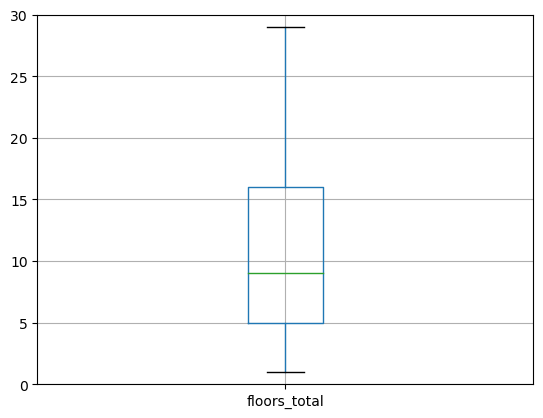

In [91]:
data.boxplot('floors_total')
plt.ylim(0, 30)
plt.show()

Проблему в уникальных значениях: 0 этажей удалили. Количество объявлений в высотных зданий мало.
Выбросами будут значения > 36. Удалим их из датафрейма.

In [92]:
# удаляем выбросы по floors_total
data = data[data['floors_total'] <= 36]

In [93]:
# просмотрим уникальные значения living_area
data['living_area'].sort_values().unique()

array([  2. ,   3. ,   5. , ..., 248.5, 250. , 255.7])

In [94]:
# узнаем количество квартир с малой жилой площадью < 8
len(data[data['living_area'] < 8])

8

Количество квартир с малой жилой площадью невелико, удалим их.

In [95]:
data = data[data['living_area'] >= 8]

In [96]:
# узнаем количество объявлений с жилой площадью > 250
len(data[data['living_area'] > 250])

1

In [97]:
data['living_area'].describe()

count   23486.000000
mean       34.202209
std        20.272445
min         8.000000
25%        19.000000
50%        30.000000
75%        42.000000
max       255.700000
Name: living_area, dtype: float64

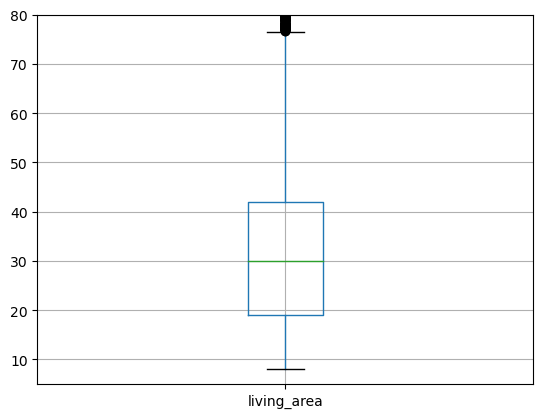

In [98]:
data.boxplot('living_area')
plt.ylim(5, 80)
plt.show()

Проблему в уникальных значениях: жилая площадь < 8 устранили. Количество объявлений с большой жилой площадью мало.
Выбросами будут значения > 250. Удалим их из датафрейма.

In [99]:
# удаляем выбросы по living_area
data = data[data['living_area'] <= 250]

# удаляем пропуски по living_area
# data = data.dropna(subset='living_area')

In [100]:
# просмотрим уникальные значения floor
data['floor'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33],
      dtype=int64)

In [101]:
data['floor'].describe()

count   23485.000000
mean        5.879796
std         4.871329
min         1.000000
25%         2.000000
50%         4.000000
75%         8.000000
max        33.000000
Name: floor, dtype: float64

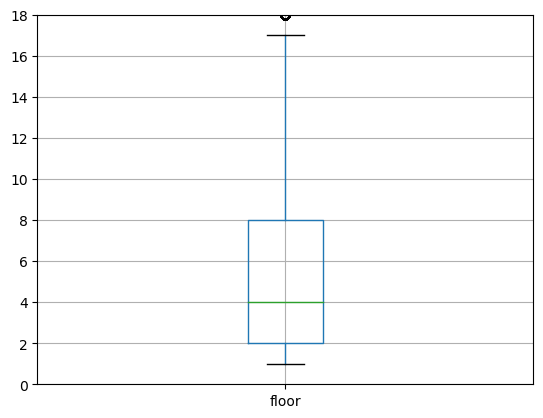

In [102]:
data.boxplot('floor')
plt.ylim(0, 18)
plt.show()

Так как мы оставили максимальный этаж в здании в датафрейме = 36, то значения этажа квартиры обрабатывать не будем.

In [103]:
# просмотрим уникальные значения в is_apartment
data['is_apartment'].sort_values().unique()

array([False,  True])

In [104]:
# просмотрим уникальные значения в studio
data['studio'].sort_values().unique()

array([False,  True])

In [105]:
# просмотрим уникальные значения в open_plan
data['open_plan'].sort_values().unique()

array([False,  True])

`is_apartment`, `studio`, `open_plan` - категориальные переменные. Значения в порядке.

In [106]:
# просмотрим уникальные значения в kitchen_area
data['kitchen_area'].sort_values().unique()

array([  1.3,   2. ,   2.3, ...,  93.2, 100.7, 107. ])

Просмотрим квартиры с площадью кухни < 2.5 и > 40.

In [107]:
# посмотрим на kitchen_area < 2.5
display(data.query('kitchen_area < 2.5').head(10))

# посмотрим на kitchen_area > 40
display(data.query('kitchen_area > 40').head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,year
906,15,2600000,27.000000,2017-07-10,1,2.750000,23,18.000000,18,False,False,False,2.000000,0,Санкт-Петербург,22131.000000,17459.000000,0.000000,NaN,1.000000,411.000000,10.000000,2017
6262,9,3100000,24.000000,2018-06-25,2,3.000000,5,16.000000,5,False,False,False,2.000000,0,Санкт-Петербург,31960.000000,4914.000000,2.000000,426.000000,1.000000,936.000000,54.000000,2018
8729,9,2200000,18.400000,2018-08-20,1,2.520000,3,14.000000,3,False,False,False,2.400000,0,Пушкин,20710.000000,30687.000000,0.000000,NaN,1.000000,155.000000,59.000000,2018
9138,17,2920000,23.290000,2018-12-12,1,2.650000,3,21.000000,1,False,False,False,2.000000,0,Санкт-Петербург,19506.000000,4008.000000,0.000000,NaN,2.000000,45.000000,107.000000,2018
11033,6,5350000,32.000000,2016-04-20,1,2.650000,14,16.000000,10,False,False,False,2.000000,0,Санкт-Петербург,19008.000000,3953.000000,0.000000,NaN,1.000000,69.000000,210.000000,2016
16367,2,2720000,25.700000,2017-10-30,1,2.650000,19,22.600000,11,False,False,False,2.000000,0,Санкт-Петербург,14472.000000,13268.000000,0.000000,NaN,0.000000,NaN,109.000000,2017
17834,5,2940000,34.700000,2017-10-09,1,2.650000,26,15.500000,14,False,False,False,2.300000,1,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,318.000000,2017
20217,7,4250000,28.500000,2019-05-01,1,2.800000,14,19.500000,10,False,False,False,1.300000,0,Санкт-Петербург,37199.000000,12721.000000,0.000000,NaN,0.000000,NaN,NaN,2019
21419,4,1870000,20.000000,2018-03-06,1,2.500000,5,14.000000,1,False,False,False,2.000000,0,Санкт-Петербург,16652.000000,15654.000000,1.000000,619.000000,1.000000,937.000000,45.000000,2018


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,year
4,2,10000000,100.000000,2018-06-19,2,3.030000,14,32.000000,13,False,False,False,41.000000,0,Санкт-Петербург,31856.000000,8098.000000,2.000000,112.000000,1.000000,48.000000,121.000000,2018
51,7,45000000,161.000000,2017-10-17,3,3.200000,8,38.000000,4,False,False,False,50.000000,0,Санкт-Петербург,32537.000000,6589.000000,0.000000,NaN,3.000000,99.000000,541.000000,2017
155,8,96000000,317.000000,2017-07-07,4,3.500000,3,183.000000,3,False,False,False,53.890000,1,Санкт-Петербург,22673.000000,1771.000000,2.000000,508.000000,3.000000,366.000000,62.000000,2017
263,12,39900000,140.600000,2016-11-19,2,3.500000,8,39.800000,7,False,False,False,49.200000,4,Санкт-Петербург,32537.000000,6589.000000,0.000000,NaN,3.000000,99.000000,NaN,2016
492,18,95000000,216.000000,2017-12-05,4,3.000000,5,86.000000,4,False,False,False,77.000000,0,Санкт-Петербург,21740.000000,436.000000,2.000000,138.000000,3.000000,620.000000,14.000000,2017
511,7,5950000,69.000000,2017-12-21,1,2.650000,16,13.000000,12,False,False,False,50.000000,1,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,56.000000,2017
581,20,65000000,365.000000,2019-03-18,7,2.900000,7,208.050000,7,False,False,False,62.050000,0,Санкт-Петербург,19827.000000,1690.000000,3.000000,378.000000,3.000000,58.000000,NaN,2019
656,10,18500000,131.000000,2018-10-11,3,2.800000,20,64.000000,19,False,False,False,50.000000,0,Санкт-Петербург,39771.000000,8672.000000,1.000000,139.000000,0.000000,NaN,53.000000,2018
681,20,24900000,249.000000,2015-08-13,7,2.650000,5,180.000000,4,False,False,False,42.330000,1,Санкт-Петербург,24810.000000,6108.000000,0.000000,NaN,0.000000,NaN,781.000000,2015
1257,6,18700000,122.100000,2015-09-24,2,2.650000,5,38.300000,3,False,False,False,42.600000,0,Санкт-Петербург,36779.000000,14931.000000,0.000000,NaN,0.000000,NaN,NaN,2015


Видно, что маленькая площадь кухни встречается в маленьких квартирах. При этом значение 1.3 сильно низкое, поэтому удалим кухни меньше 2 м2.
Большая площадь кухни встречается в квартирах с большой площадью.

In [108]:
data = data[data['kitchen_area'] >= 2]

In [109]:
# узнаем количество объявлений с площадью кухни > 80
len(data[data['kitchen_area'] > 80])

5

In [110]:
data['kitchen_area'].describe()

count   23484.000000
mean       10.402256
std         5.710102
min         2.000000
25%         7.000000
50%         9.000000
75%        12.000000
max       107.000000
Name: kitchen_area, dtype: float64

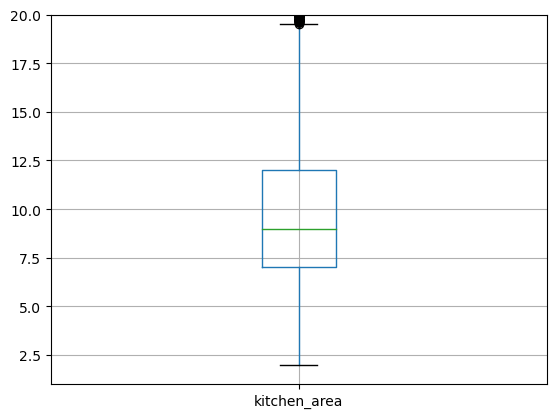

In [111]:
data.boxplot('kitchen_area')
plt.ylim(1, 20)
plt.show()

Проблему в уникальных значениях: площадь кухни < 2 устранили. Количество объявлений с большой кухней > 80 мало.
Выбросами будут значения > 80. Удалим их из датафрейма.

In [112]:
# удаляем выбросы по kitchen_area
data = data[(data['kitchen_area'] <= 80)]

In [113]:
# просмотрим уникальные значения в balcony
data['balcony'].sort_values().unique()

array([0, 1, 2, 3, 4, 5])

In [114]:
# узнаем количество объявлений с балконами >= 4
len(data[data['balcony'] >= 4])

482

In [115]:
data[data['balcony'] >= 4].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,year
41,16,7900000,74.000000,2016-05-04,3,2.650000,14,59.000000,8,False,False,False,12.000000,5,Санкт-Петербург,37715.000000,12612.000000,1.000000,725.000000,1.000000,759.000000,179.000000,2016
42,13,22000000,161.800000,2015-07-08,4,2.800000,4,80.900000,2,False,False,False,17.600000,5,Петергоф,35416.000000,30605.000000,2.000000,47.000000,1.000000,907.000000,987.000000,2015
116,18,10999000,97.200000,2017-11-13,3,2.500000,16,55.404000,16,False,False,False,18.300000,5,Санкт-Петербург,19426.000000,21138.000000,0.000000,NaN,2.000000,390.000000,394.000000,2017
121,20,33000000,180.000000,2017-02-17,3,2.900000,9,86.000000,8,False,False,False,24.000000,4,Санкт-Петербург,25689.000000,4264.000000,1.000000,633.000000,0.000000,NaN,144.000000,2017
250,13,3200000,51.700000,2019-01-22,2,2.650000,16,29.200000,5,False,False,False,7.700000,4,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,21.000000,2019


In [116]:
data['balcony'].describe()

count   23479.000000
mean        0.593935
std         0.959806
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         5.000000
Name: balcony, dtype: float64

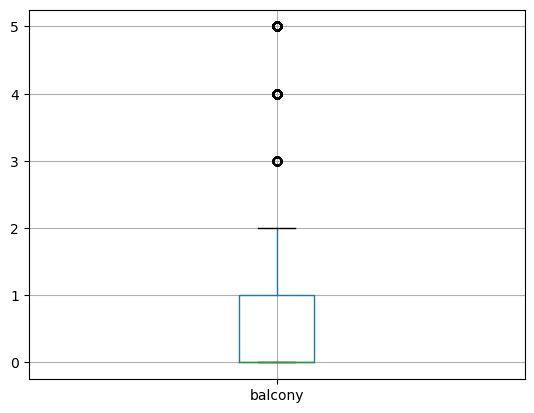

In [117]:
data.boxplot('balcony')
plt.show()

Есть квартиры с 4 и 5 балконами различной площади. Это странно либо ошибка ввода, либо в Петербурге в хватает квартир с большим количеством балконов. На исследование балконы не влияют, обрабатывать не будем.

In [118]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23479 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23479 non-null  int64         
 1   last_price            23479 non-null  int32         
 2   total_area            23479 non-null  float64       
 3   first_day_exposition  23479 non-null  datetime64[ns]
 4   rooms                 23479 non-null  int64         
 5   ceiling_height        23479 non-null  float64       
 6   floors_total          23479 non-null  int32         
 7   living_area           23479 non-null  float64       
 8   floor                 23479 non-null  int64         
 9   is_apartment          23479 non-null  bool          
 10  studio                23479 non-null  bool          
 11  open_plan             23479 non-null  bool          
 12  kitchen_area          23479 non-null  float64       
 13  balcony         

In [119]:
# просмотрим уникальные значения в airports_nearest
data['airports_nearest'].sort_values().unique()

array([    0.,  6450.,  6914., ..., 84853., 84869.,    nan])

In [120]:
data['airports_nearest'].describe()

count   17986.000000
mean    28799.467197
std     12643.359829
min         0.000000
25%     18551.000000
50%     26755.500000
75%     37292.500000
max     84869.000000
Name: airports_nearest, dtype: float64

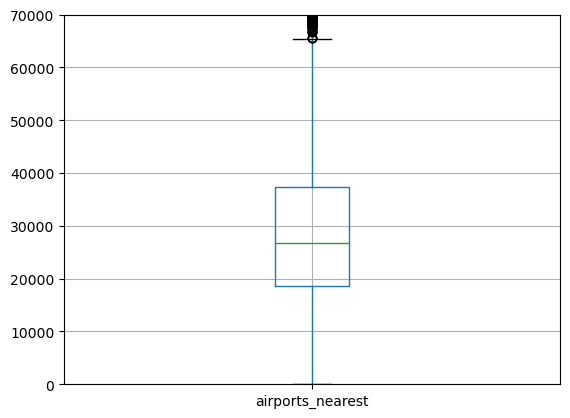

In [121]:
data.boxplot('airports_nearest')
plt.ylim(0, 70000)
plt.show()

Значение картографическое. Есть значения о и NaN. Обработать не можем.

In [122]:
# просмотрим уникальные значения в city_centers_nearest
data['city_centers_nearest'].sort_values().unique()

array([  181.,   208.,   215., ..., 65952., 65968.,    nan])

In [123]:
data['city_centers_nearest'].describe()

count   18007.000000
mean    14223.612095
std      8607.623421
min       181.000000
25%      9289.000000
50%     13123.000000
75%     16296.000000
max     65968.000000
Name: city_centers_nearest, dtype: float64

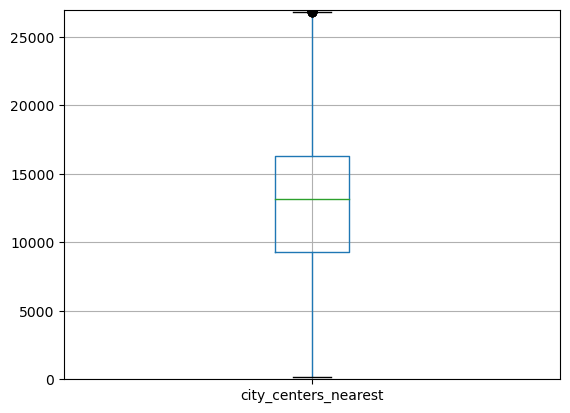

In [124]:
data.boxplot('city_centers_nearest')
plt.ylim(0, 27000)
plt.show()

Значение картографическое. Есть значения NaN. Обработать не можем.

In [125]:
# просмотрим уникальные значения в parks_nearest
data['parks_nearest'].sort_values().unique()
#data['parks_nearest'].value_counts()

array([1.000e+00, 3.000e+00, 4.000e+00, 7.000e+00, 9.000e+00, 1.000e+01,
       1.100e+01, 1.200e+01, 1.300e+01, 1.400e+01, 1.500e+01, 1.600e+01,
       1.700e+01, 1.800e+01, 1.900e+01, 2.000e+01, 2.100e+01, 2.200e+01,
       2.300e+01, 2.400e+01, 2.700e+01, 2.800e+01, 3.000e+01, 3.200e+01,
       3.300e+01, 3.400e+01, 3.500e+01, 3.600e+01, 3.700e+01, 3.800e+01,
       3.900e+01, 4.000e+01, 4.100e+01, 4.200e+01, 4.300e+01, 4.400e+01,
       4.500e+01, 4.600e+01, 4.700e+01, 4.800e+01, 4.900e+01, 5.000e+01,
       5.100e+01, 5.200e+01, 5.300e+01, 5.400e+01, 5.500e+01, 5.600e+01,
       5.700e+01, 5.800e+01, 5.900e+01, 6.000e+01, 6.100e+01, 6.200e+01,
       6.300e+01, 6.400e+01, 6.500e+01, 6.600e+01, 6.700e+01, 6.800e+01,
       6.900e+01, 7.100e+01, 7.200e+01, 7.300e+01, 7.400e+01, 7.500e+01,
       7.600e+01, 7.700e+01, 7.800e+01, 8.000e+01, 8.100e+01, 8.200e+01,
       8.300e+01, 8.400e+01, 8.500e+01, 8.600e+01, 8.700e+01, 8.800e+01,
       9.000e+01, 9.100e+01, 9.200e+01, 9.300e+01, 

In [126]:
data['parks_nearest'].describe()

count   7981.000000
mean     490.741636
std      341.553954
min        1.000000
25%      288.000000
50%      455.000000
75%      612.000000
max     3190.000000
Name: parks_nearest, dtype: float64

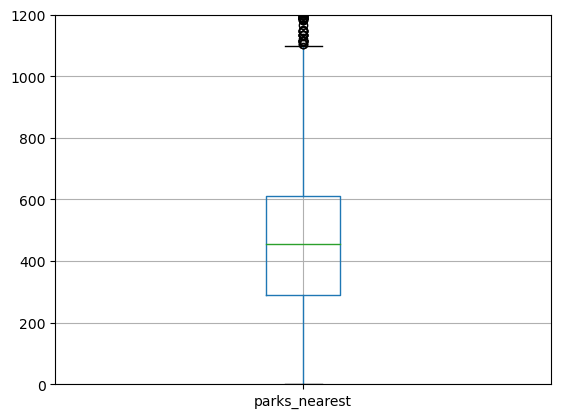

In [127]:
data.boxplot('parks_nearest')
plt.ylim(0, 1200)
plt.show()

Значение картографическое. Есть значения 0 и NaN. Обработать не можем.

In [128]:
# просмотрим уникальные значения в ponds_nearest
data['ponds_nearest'].sort_values().unique()

array([  13.,   16.,   19., ..., 1341., 1344.,   nan])

In [129]:
data['ponds_nearest'].describe()

count   8997.000000
mean     519.507725
std      277.813298
min       13.000000
25%      295.000000
50%      503.000000
75%      733.000000
max     1344.000000
Name: ponds_nearest, dtype: float64

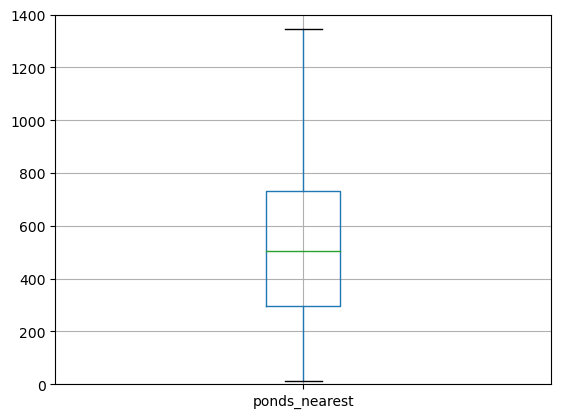

In [130]:
data.boxplot('ponds_nearest')
plt.ylim(0, 1400)
plt.show()

Значение картографическое. Есть значения NaN. Обработать не можем.

In [131]:
# просмотрим уникальные значения в parks_around_3000
data['parks_around_3000'].sort_values().unique()

array([ 0.,  1.,  2.,  3., nan])

In [132]:
data['parks_around_3000'].describe()

count   18008.000000
mean        0.608507
std         0.799705
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         3.000000
Name: parks_around_3000, dtype: float64

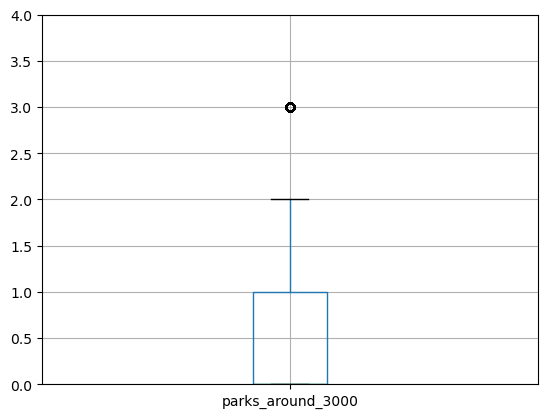

In [133]:
data.boxplot('parks_around_3000')
plt.ylim(0, 4)
plt.show()

Есть значения 0 и NaN. Узнать количество парков, можно только по геоданным, которых у нас нет. Обработать не можем.

In [134]:
# просмотрим уникальные значения в ponds_around_3000
data['ponds_around_3000'].sort_values().unique()

array([ 0.,  1.,  2.,  3., nan])

In [135]:
data['ponds_around_3000'].describe()

count   18008.000000
mean        0.766604
std         0.936124
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         3.000000
Name: ponds_around_3000, dtype: float64

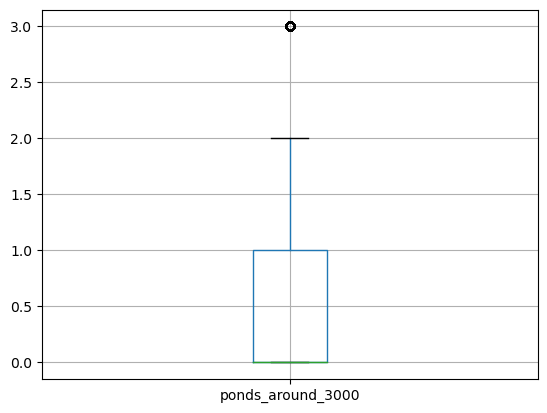

In [136]:
data.boxplot('ponds_around_3000')
#plt.ylim(0, 4)
plt.show()

Есть значения 0 и NaN. Узнать количество водоемов, можно только по геоданным, которых у нас нет. Обработать не можем.

In [137]:
# просмотрим уникальные значения в days_exposition
data['days_exposition'].sort_values().unique()

array([1.000e+00, 2.000e+00, 3.000e+00, ..., 1.572e+03, 1.580e+03,
             nan])

In [138]:
data['days_exposition'].describe()

count   20321.000000
mean      180.698391
std       219.467434
min         1.000000
25%        45.000000
50%        95.000000
75%       231.000000
max      1580.000000
Name: days_exposition, dtype: float64

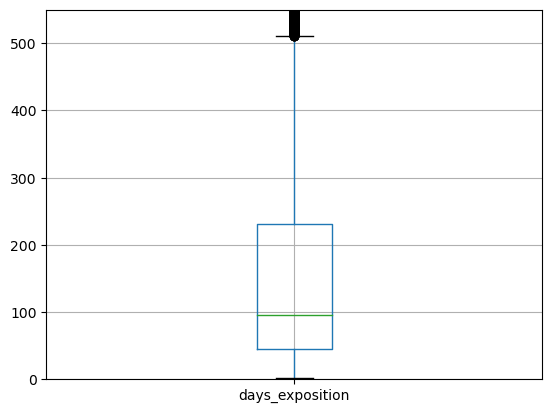

In [139]:
data.boxplot('days_exposition')
plt.ylim(0, 550)
plt.show()

Длительность продаж от 1 до 1580. Обрабатывать не будем.

In [140]:
# посмотрим на датафрейм
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23479 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23479 non-null  int64         
 1   last_price            23479 non-null  int32         
 2   total_area            23479 non-null  float64       
 3   first_day_exposition  23479 non-null  datetime64[ns]
 4   rooms                 23479 non-null  int64         
 5   ceiling_height        23479 non-null  float64       
 6   floors_total          23479 non-null  int32         
 7   living_area           23479 non-null  float64       
 8   floor                 23479 non-null  int64         
 9   is_apartment          23479 non-null  bool          
 10  studio                23479 non-null  bool          
 11  open_plan             23479 non-null  bool          
 12  kitchen_area          23479 non-null  float64       
 13  balcony         

В датафрейме были устранены редкие и выбивающиеся значения во всех столбцах. Выбросы были удалены из датафрейма.

**Вывод:** 
1. Названия столбцов были приведены к единому 'зменому стилю'.

2. Неявные дубликаты в названии населенных пунктов были обработаны.

3. Было проверено, что в датафрейме нет строк-дубликатов.

4. Были устранены редкие и выбивающиеся значения. Часть данных была неправильно введена в датафрейм и была исправлена. Другая часть данных представляет выбросы, эти данные были исключены из датафрейма. Датафрейм подготовлен к исследованию.

5. У объявлений есть множественные пропуски по картографическим данным. Эту информацию необходимо передать разработчикам. Вероятно это программная ошибка (картографические данные не были получены при размещении объявления), либо это ошибка выгрузки данных.

### Посчитайте и добавьте в таблицу новые столбцы

Добавим в таблицу цену одного квадратного метра.

In [141]:
# цена за 1 м2: цена продажи делить на общую площадь
data['price_sqmeter'] = data['last_price'] / data['total_area']

Добавим день публикации объявления (0 - понедельник, 1 - вторник и т.д.).

In [142]:
# к методу DatetimeIndex применим параметр dayofweek
data['day_week'] = pd.DatetimeIndex(data['first_day_exposition']).dayofweek

Добавим месяц публикации объявления.

In [143]:
# к методу DatetimeIndex применим параметр month
data['month'] = pd.DatetimeIndex(data['first_day_exposition']).month

Добавим год публикации объявления.

In [144]:
# к методу DatetimeIndex применим параметр year
data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year

Добавим тип этажа квартиры (значения — «первый», «последний», «другой»).

In [145]:
# создадим фунц
def type_floor_realty(row):
    """  
    по значению столбца floor и floors_total, добавляет тип этажа
    # - 'первый' если floor = 1 
    # - 'последний' если floor = 1 
    # - 'другой' если этаж определить нельзя
    """  
    floor = row['floor']
    floors_total = row['floors_total']
    try:
        if floor == 1:
            return 'первый'
        elif floor == floors_total:
            return 'последний'
    
        return 'другой'
    except:
        return 'ошибка'

In [146]:
data['type_floor'] = data.apply(type_floor_realty, axis=1)

In [147]:
# проверим выполнение функции
data['type_floor'].unique()

array(['другой', 'первый', 'последний'], dtype=object)

Добавим расстояние в км до центра города.

In [148]:
data['city_center_km'] = data['city_centers_nearest'] / 1000
# округлим значения
data['city_center_km'] = np.floor(data['city_center_km'])
#data['city_center_km'] = round(data['city_center_km'])

Проверим, что столбцы и значения добавлены в датафрейм.

In [149]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,year,price_sqmeter,day_week,month,type_floor,city_center_km
0,20,13000000,108.000000,2019-03-07,3,2.700000,16,51.000000,8,False,False,False,25.000000,0,Санкт-Петербург,18863.000000,16028.000000,1.000000,482.000000,2.000000,755.000000,NaN,2019,120370.370370,3,3,другой,16.000000
1,7,3350000,40.400000,2018-12-04,1,2.650000,11,18.600000,1,False,False,False,11.000000,2,поселок Шушары,12817.000000,18603.000000,0.000000,NaN,0.000000,NaN,81.000000,2018,82920.792079,1,12,первый,18.000000
2,10,5196000,56.000000,2015-08-20,2,2.650000,5,34.300000,4,False,False,False,8.300000,0,Санкт-Петербург,21741.000000,13933.000000,1.000000,90.000000,2.000000,574.000000,558.000000,2015,92785.714286,3,8,другой,13.000000
3,0,64900000,159.000000,2015-07-24,3,2.650000,14,90.630000,9,False,False,False,27.030000,0,Санкт-Петербург,28098.000000,6800.000000,2.000000,84.000000,3.000000,234.000000,424.000000,2015,408176.100629,4,7,другой,6.000000
4,2,10000000,100.000000,2018-06-19,2,3.030000,14,32.000000,13,False,False,False,41.000000,0,Санкт-Петербург,31856.000000,8098.000000,2.000000,112.000000,1.000000,48.000000,121.000000,2018,100000.000000,1,6,другой,8.000000


In [150]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23479 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23479 non-null  int64         
 1   last_price            23479 non-null  int32         
 2   total_area            23479 non-null  float64       
 3   first_day_exposition  23479 non-null  datetime64[ns]
 4   rooms                 23479 non-null  int64         
 5   ceiling_height        23479 non-null  float64       
 6   floors_total          23479 non-null  int32         
 7   living_area           23479 non-null  float64       
 8   floor                 23479 non-null  int64         
 9   is_apartment          23479 non-null  bool          
 10  studio                23479 non-null  bool          
 11  open_plan             23479 non-null  bool          
 12  kitchen_area          23479 non-null  float64       
 13  balcony         

**Вывод:** 
1. Дополнительные столбцы добавлены в датафрейм для проведения исследования.

2. Необходимые показатели в столбцах были вычислены.

### Проведите исследовательский анализ данных

#### Изучение и описание параметров

Проведем исследование параметров объявлений. Построим гистрограммы, посмотрим распределени, опишем свои наблюдения.

Изучим общую площадь.

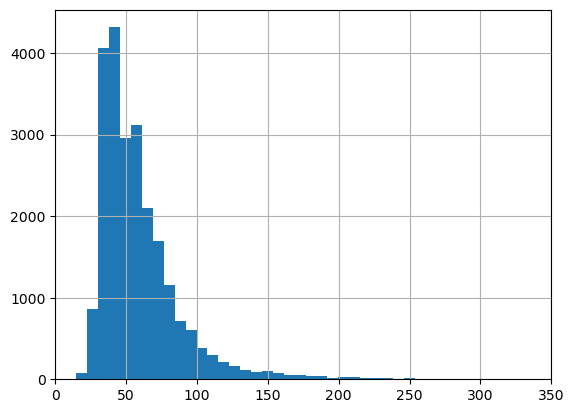

In [151]:
# построим гистограмму общей площади
data['total_area'].hist(bins=50)
plt.xlim(0, 350)
plt.show()

На гистограмме видно распределение скошенное **вправо**, виден пик на отметке 45. Площадь квартир в основном 25 - 75. Далее площадь плавно снижается. Квартир больше 125 м2 крайне мало.

Изучим жилую площадь.

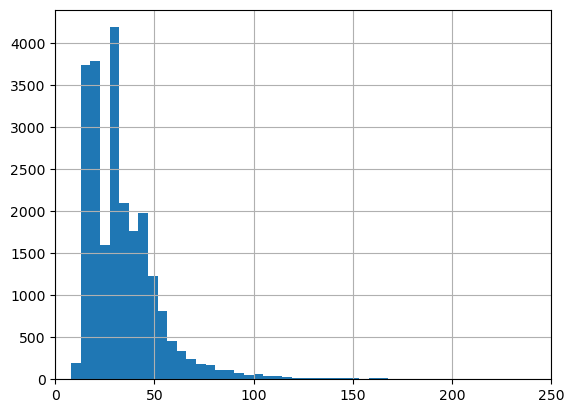

In [152]:
# построим гистограмму
data['living_area'].hist(bins=50)
plt.xlim(0, 250)
plt.show()

На гистограмме видно распределение скошенное **вправо**. Видно 2 пика на отметках 20 и 30. Проседание возможно, что квартир с площадью 25 мало.

Жилая площадь квартир в основном 20 - 50 м2. Далее площадь плавно снижается. Квартир с жилой площадью больше 75 м2 крайне мало.

Изучим площадь кухни.

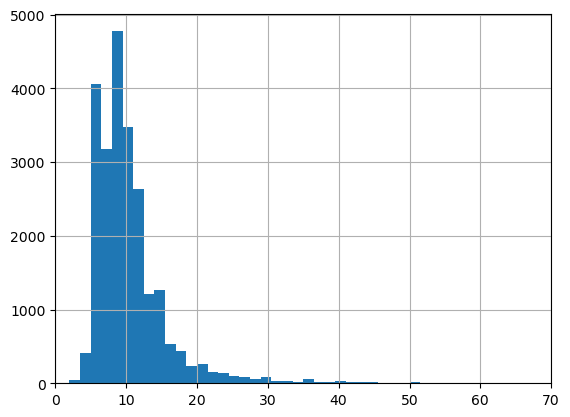

In [153]:
# построим гистограмму
data['kitchen_area'].hist(bins=50)
plt.xlim(0, 70)
plt.show()

На гистограмме видно распределение скошенное **вправо**. Видно 2 пика на отметках 7 и 10. Проседание возможно, что кухонь с площадью 8 и 9 мало.

Площадь кухни в основном 5 - 15 м2. Далее площадь плавно снижается. Кухонь с площадью больше 20 м2 крайне мало.

Изучим цену объекта.

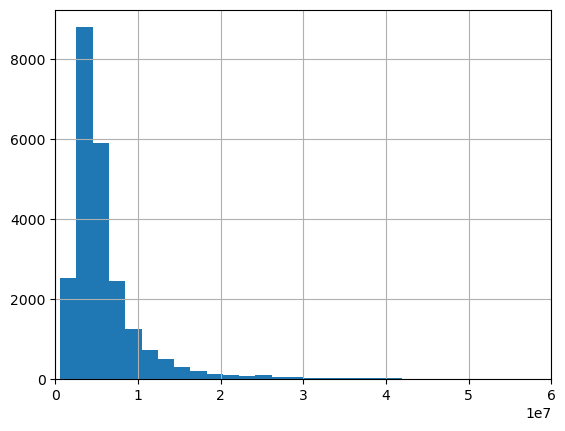

In [154]:
data['last_price'].hist(bins=50)
plt.xlim(0, 60000000)
plt.show()

На гистограмме видно нормальное распределение. Виден пик на цене в 5 млн.

Площадь квартир в основном 2 - 10 млн. Далее цена плавно снижается. Квартир с ценой больше 15 млн крайне мало.

Изучим количество комнат.

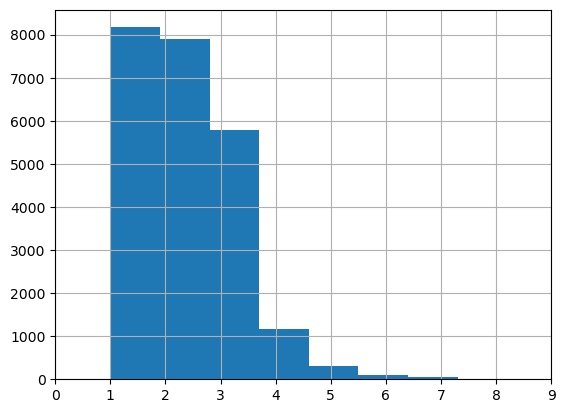

In [155]:
data['rooms'].hist(bins=10)
plt.xlim(0, 9)
plt.show()

На гистограмме видно распределение скошенное **вправо**. Виден пик на отметке в 1 и 2 комнаты.

Количество комнат в основном 1 - 3. Далее количество комнат  плавно снижается. Квартир с количество комнат от 5 крайне мало.

Изучим высоту потолков.

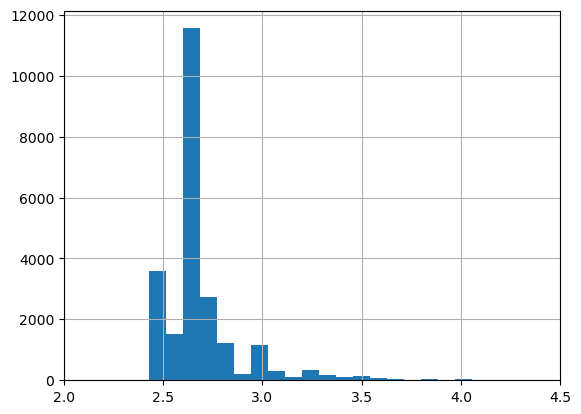

In [156]:
data['ceiling_height'].hist(bins=70)
plt.xlim(2, 4.5)
plt.show()

На гистограмме видно нормальное распределение. Виден пик на отметке в 2.7, заметен малый пик в 2.4 м и 3 м.

Высота потолка в квартирах в основном 2.4 - 2.7 м. Далее высота плавно снижается. Квартир с высотой потолка от 3 метров крайне мало.

Изучим этаж квартиры.

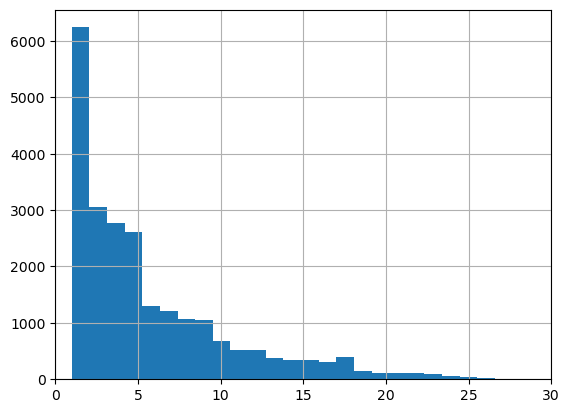

In [157]:
data['floor'].hist(bins=30)
plt.xlim(0, 30)
plt.show()

На гистограмме видно распределение скошенное **вправо**. Виден пик на отметке 2 этажа.

Квартиры в основном распологаются на 2 - 5 этажах. Далее этажность плавно снижается. Квартир с расположением выше 15  этажа крайне мало.

Изучим тип этажа квартиры («первый», «последний», «другой»).

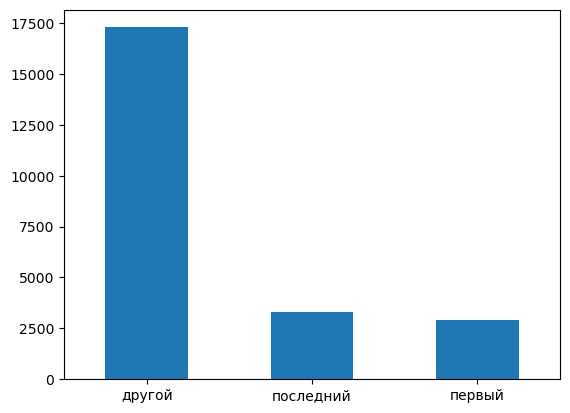

In [158]:
# сгруппируем категориальный параметр с помощью value_counts и построим график типа bar
data['type_floor'].value_counts().plot(y='type_floor', kind='bar', rot=0)
plt.show()

Посмотрем на столбчатый график, можно сделать вывод, что продающиеся квартиры в большинстве имеют ни первый, ни последний этаж. Что логично, средних этажей больше.

Изучим общее количество этажей в доме.

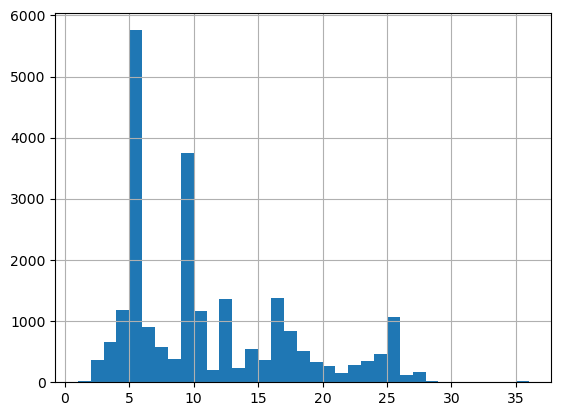

In [159]:
data['floors_total'].hist(bins=35)
plt.show()

На гистограмме видно **нормальное распределение с выбросами**. Видны 2 пика на отметках 6 этажей и 9 этажей. 
Общее количество этажей в квартира до центра 2 - 25. Есть квартиры в домах и с 35 этажами, но их крайне мало.

Изучим расстояние до центра города в метрах.

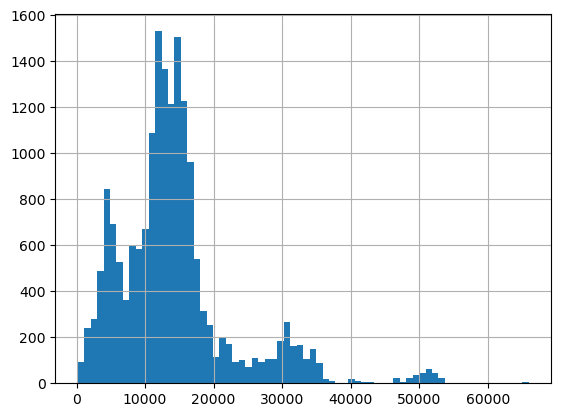

In [160]:
data['city_centers_nearest'].hist(bins=70)
plt.show()

На гистограмме видно распределение скошенное **вправо**. Видны 2 пика на 5 км и 15 км. 
Расстояние у квартир до центра города в основном 5 - 18 километров. Квартир, где до центра города более 35 км крайне мало.

Изучим расстояние до ближайшего аэропорта.

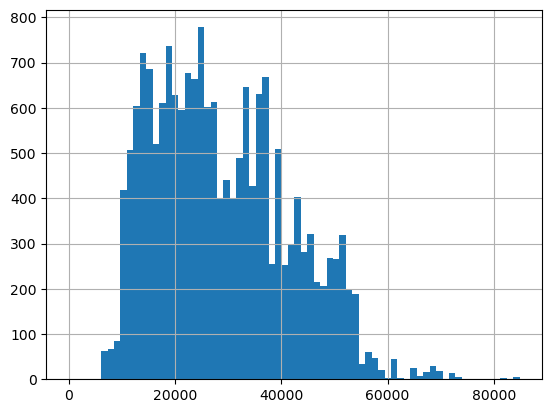

In [161]:
data['airports_nearest'].hist(bins=70)
plt.show()

На гистограмме видно распределение скошенное **вправо**. Видны 3 пика на 15, 25 км и 35 км.
Расстояние у квартир до аэропорта в основном 10 - 50 километров. Квартир, где до аэропорта более 50 км крайне мало.

Изучим расстояние до ближайшего парка.

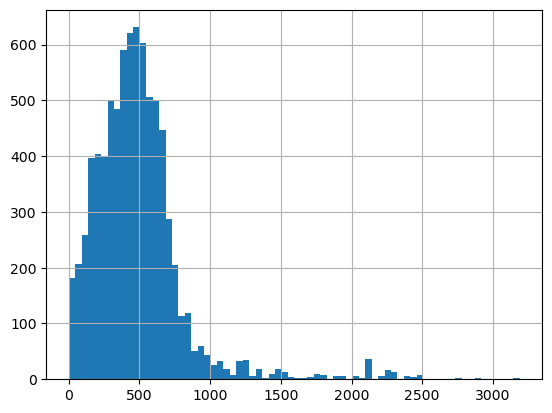

In [162]:
data['parks_nearest'].hist(bins=70)
plt.show()

На гистограмме видно распределение скошенное **вправо**. Виден пик на 500 метрах.
Расстояние у квартир до парка в основном 250 - 750 метров. Квартир, где до парка более 1 км крайне мало.

Изучим день и месяц публикации объявления.

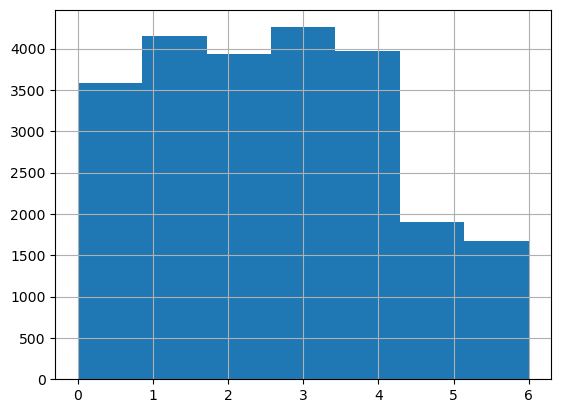

In [163]:
# изучим день
data['day_week'].hist(bins=7)
plt.show()

Посмотрем на график, можно сделать вывод, что объявления в основном размещают в будние дни. Причем рост идет к пятнице.
На выходных количество объявлений резко падает.

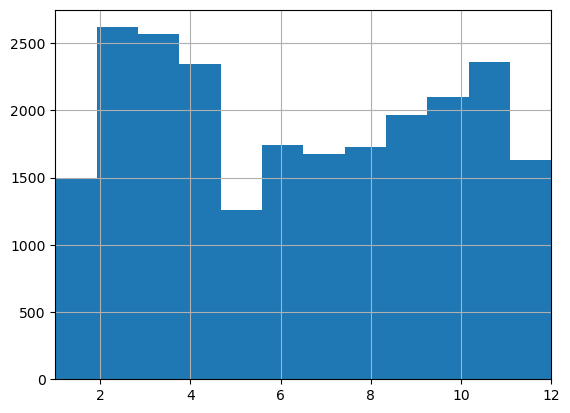

In [164]:
# изучим месяц
data['month'].hist(bins=12)
plt.xlim(1, 12)
plt.show()

Посмотрем на график, можно сделать вывод, что объявления в основном размещают в конце зимы и начале весны (с февраля по апрель) и осенью (с сентября по ноябрь).
В январе, мае и декабре число обявлений крайне мало.

#### Изучение длительности продажи квартир

Теперь посмотрим как быстро или долго продавались квартиры по столбцу `days_exposition`.

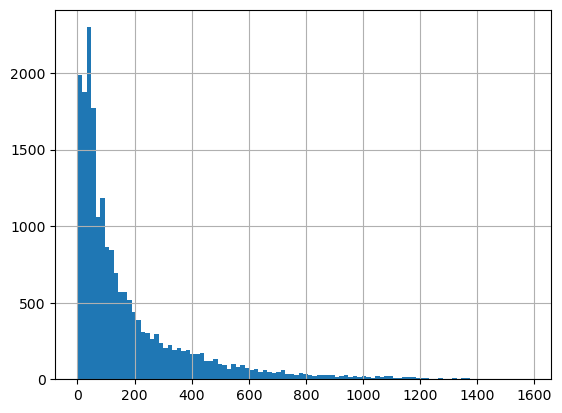

In [165]:
# построим гистограмму
data['days_exposition'].hist(bins=100)
plt.show()

In [166]:
# узнаем среднее и медиану через метод describe
display(data['days_exposition'].describe())

#display(data['days_exposition'].mean())
#display(data['days_exposition'].median())

count   20321.000000
mean      180.698391
std       219.467434
min         1.000000
25%        45.000000
50%        95.000000
75%       231.000000
max      1580.000000
Name: days_exposition, dtype: float64

Среднее время продажи = 180 дней, а медианна = 95. Значит есть квартиры, которые продаются достаточно долго.
Гистограмма длительности продажи квартир описывается распределением Пуассона. Видно, что квартиры продаются быстро. Число квартир, продающихся долго уменьшается, с увеличением времени.

Некоторые квартиры продавались и более года, максимальное значение 1580 дня (больше 4 лет). В основном квартиры продаются до 200 дней, далее время продажи уменьшается уже постепенно.

Итак, согласно квартилям распределения, быстрыми продажи можно считать до 231 дня, а необычно долгими - свыше 232 дней

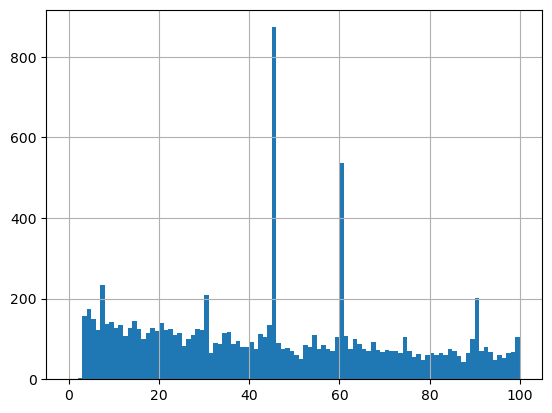

In [167]:
data['days_exposition'].hist(bins=100, range=(0, 100))
plt.show()

In [168]:
# просмотрим на строки с выбросами в 45 и 60 дней 
data[(data['days_exposition'] == 45) | (data['days_exposition'] == 60)].head(30)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,year,price_sqmeter,day_week,month,type_floor,city_center_km
22,20,5000000,58.000000,2017-04-24,2,2.750000,25,30.000000,15,False,False,False,11.000000,2,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.000000,2017,86206.896552,0,4,другой,NaN
78,9,4350000,37.000000,2018-02-22,1,2.650000,19,18.000000,6,False,False,False,10.700000,0,Санкт-Петербург,34324.000000,14192.000000,0.000000,NaN,0.000000,NaN,45.000000,2018,117567.567568,3,2,другой,14.000000
82,3,4500000,80.500000,2018-01-15,3,2.650000,25,45.885000,16,False,False,False,13.685000,0,поселок Шушары,12430.000000,18217.000000,0.000000,NaN,0.000000,NaN,60.000000,2018,55900.621118,0,1,другой,18.000000
89,9,2500000,63.000000,2018-10-25,3,2.500000,5,43.000000,4,False,False,False,9.000000,0,поселок Сиверский,NaN,NaN,NaN,NaN,NaN,NaN,45.000000,2018,39682.539683,3,10,другой,NaN
105,12,4900000,32.000000,2018-01-07,1,2.650000,25,15.000000,5,False,False,False,9.000000,0,Санкт-Петербург,52480.000000,15598.000000,0.000000,NaN,1.000000,464.000000,60.000000,2018,153125.000000,6,1,другой,15.000000
110,6,3850000,72.300000,2017-09-29,2,2.650000,3,27.400000,2,False,False,False,23.600000,0,деревня Пикколово,NaN,NaN,NaN,NaN,NaN,NaN,45.000000,2017,53250.345781,4,9,другой,NaN
118,8,4500000,31.000000,2019-02-24,1,2.500000,9,17.000000,4,False,False,False,5.000000,0,Санкт-Петербург,35445.000000,9089.000000,0.000000,NaN,2.000000,439.000000,60.000000,2019,145161.290323,6,2,другой,9.000000
143,9,2990000,30.000000,2016-06-08,1,2.500000,9,20.000000,9,False,False,False,5.600000,0,Санкт-Петербург,30067.000000,6262.000000,0.000000,NaN,1.000000,332.000000,60.000000,2016,99666.666667,2,6,последний,6.000000
153,12,4350000,55.000000,2017-05-21,2,2.570000,9,31.200000,2,False,False,False,8.300000,0,Петергоф,45958.000000,34425.000000,1.000000,589.000000,0.000000,NaN,45.000000,2017,79090.909091,6,5,другой,34.000000
158,15,3100000,47.300000,2017-11-07,2,2.650000,5,27.500000,2,False,False,False,8.500000,0,поселок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,45.000000,2017,65539.112051,1,11,другой,NaN


Видны выбросы на 45 и 60 дней. Закономерности не видны (параметры объявлений различны). Как предположение период объявлений заканчивался в этот срок, и продавцы далее не размещали объявления

#### Изучение факторы влияющих на стоимость объекта

Изучим факторы, которые влияют на стоимость объекта.

In [169]:
# сведем информацию в таблице для вычсиления корреляции
correlation = data[['last_price', 'total_area', 'living_area', 'kitchen_area', \
                    'rooms', 'type_floor', 'day_week', 'month', 'year']]
# correlation.head()

In [170]:
# вычислим коэффициент корреляции Пирсона между всеми парами столбцов
correlation.corr()

C:\Users\Sam\AppData\Local\Temp\ipykernel_15572\2466305102.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation.corr()


,last_price,total_area,living_area,kitchen_area,rooms,day_week,month,year
last_price,1.000000,0.764721,0.685510,0.600505,0.471895,-0.005630,0.008551,-0.051691
total_area,0.764721,1.000000,0.941568,0.637872,0.783963,-0.011026,0.008084,-0.083508
living_area,0.685510,0.941568,1.000000,0.456257,0.853906,-0.008867,0.002575,-0.073589
kitchen_area,0.600505,0.637872,0.456257,1.000000,0.303104,-0.010973,0.008683,-0.059960
rooms,0.471895,0.783963,0.853906,0.303104,1.000000,-0.006591,-0.002032,-0.053013
day_week,-0.005630,-0.011026,-0.008867,-0.010973,-0.006591,1.000000,0.012366,-0.003637
month,0.008551,0.008084,0.002575,0.008683,-0.002032,0.012366,1.000000,-0.270133
year,-0.051691,-0.083508,-0.073589,-0.059960,-0.053013,-0.003637,-0.270133,1.000000


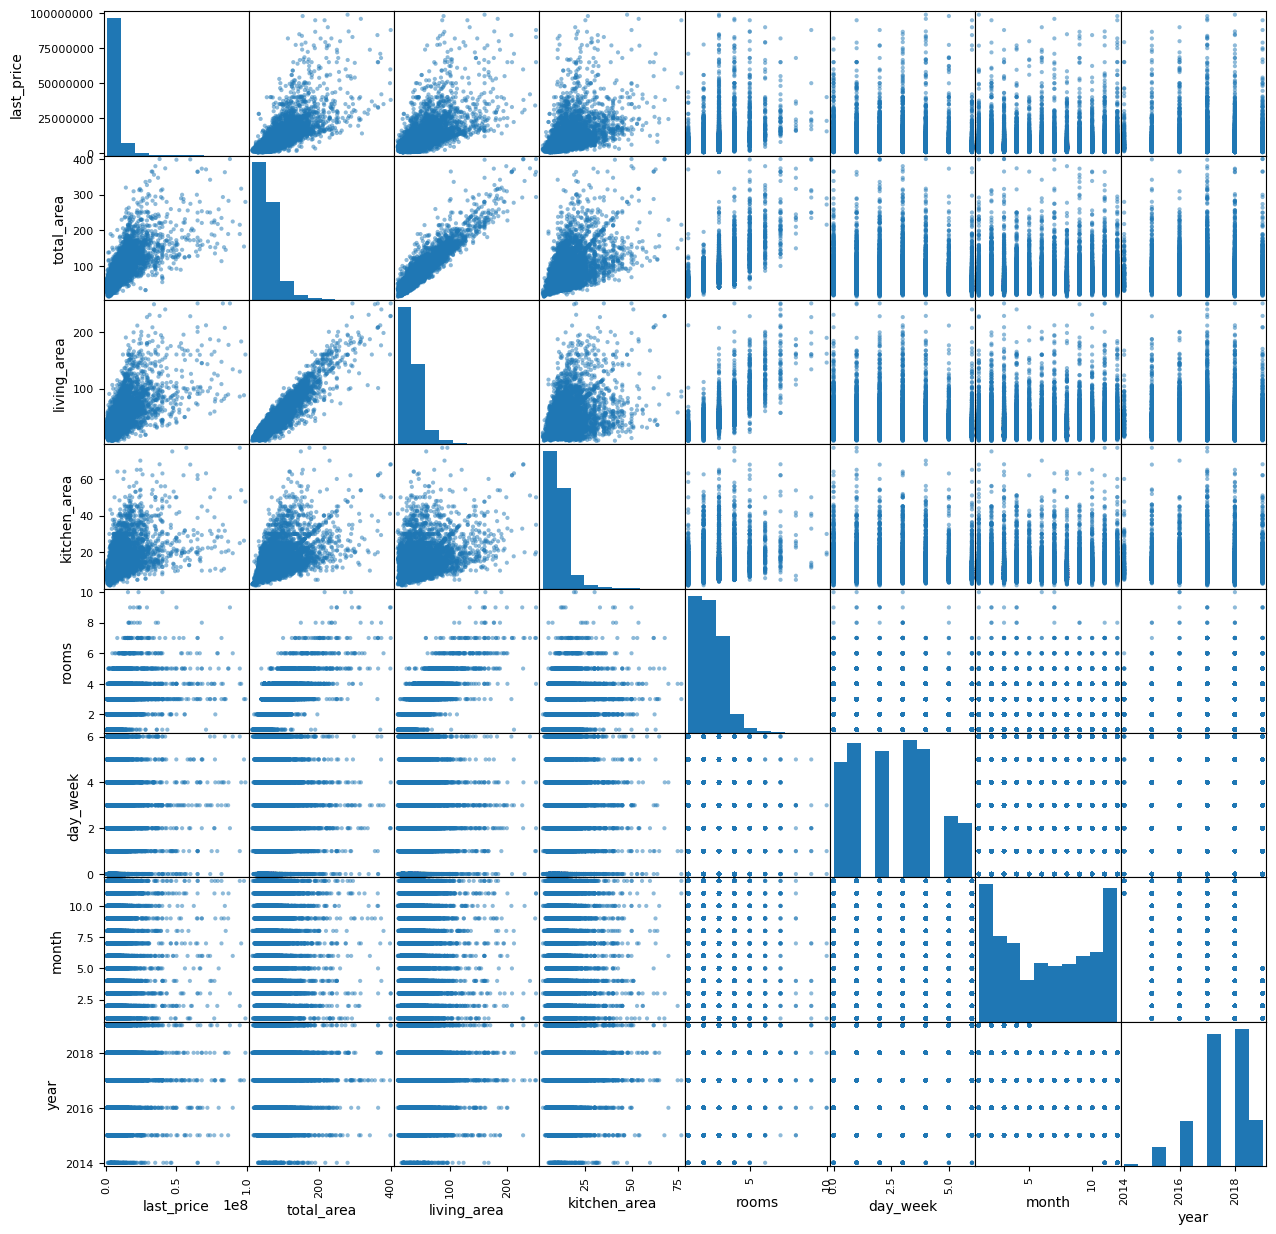

In [171]:
# построим матрицу диаграмм рассеивания
pd.plotting.scatter_matrix(correlation, figsize=(15, 15))
plt.show()

Рассмотрим матрицу корреляции и матрицу диаграмм рассеивания.

На стоимость объекта сильно влияет общая площадь и жилая площадь квартиры. На стоимость квартиры уже меньше влияет площадь кухни и количество комнат.

Влияние на стоимость квартиры не оказывает день, месяц и год объявления.

#### Расчет средней цены одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

Найдем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра.

In [172]:
# сделаем срез данных по населенным пунктам и сведем информацию в сводной таблице
top_advert = (data.pivot_table(index='locality_name', values='price_sqmeter', aggfunc='mean')
    .sort_values('price_sqmeter', ascending=False))[:10]

#top_advert = top_advert[:10]
#data['locality_name'].unique()

display(top_advert)

,price_sqmeter
locality_name,
Зеленогорск,115122.799198
Санкт-Петербург,113453.862943
деревня Бор,105539.261570
поселок Репино,104238.614786
Пушкин,103125.819291
Сестрорецк,101757.616875
поселок Лисий Нос,100660.814239
Кудрово,100134.543715
деревня Мистолово,98549.976709


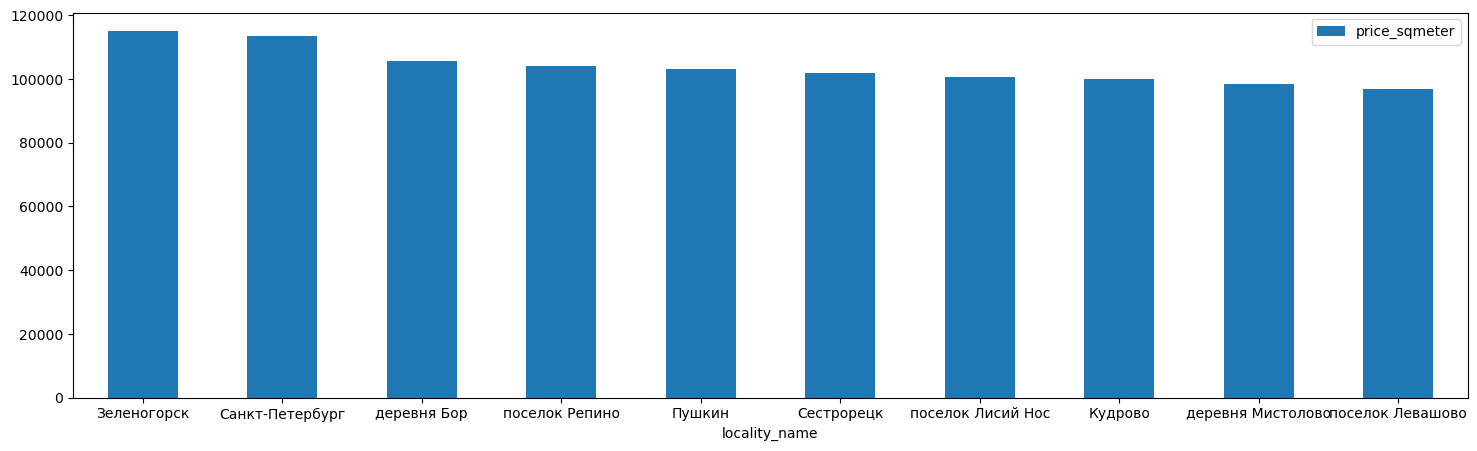

In [173]:
# построим столбчатую диаграмму и посмотрим на населённые пункты с самой высокой и низкой стоимостью
top_advert.plot(y='price_sqmeter', kind='bar', rot=0, figsize=(18, 5))
plt.show()

Рассмотрим Топ-10 населенных пуктов по цене за м2.

На графике видно, что населенные пункты с самой высокой стоимостью квадратного метра: Зеленогорск, Санкт-Петербург, деревня Бор, поселок Репино, Пушкин.

А населенные пункты с самой низкой стоимостью квадратного метра: Сестрорецк, поселок Лисий Нос, Кудрово, деревня Мистолово, поселок Левашово.

#### Расчет стоимости км жилья в Санкт-Петербурге

Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города.


In [174]:
# сделаем срез данных по г. Санкт-Петербург и сведем информацию в сводной таблице
cost_km = (data.query('locality_name == "Санкт-Петербург"')
        .pivot_table(index='city_center_km', values='last_price', aggfunc=['sum', 'count'])
)

# с помощью метода agg
# data.query('locality_name == "Санкт-Петербург"').groupby('city_center_km').agg({'last_price': ['sum', 'count']})
display(cost_km)

,sum,count
,last_price,last_price
city_center_km,,
0.000000,1512844628,80
1.000000,3448675999,232
2.000000,4090454280,299
3.000000,5751532871,517
4.000000,11124255970,890
5.000000,9697854861,751
6.000000,6170844579,463
7.000000,4373173212,401


In [175]:
# посмотрим названия столбцов в сводной таблице
display(cost_km.columns)

# переименуем названия столбцов
cost_km.columns = ['sum', 'count']

# display(cost_km.columns)

MultiIndex([(  'sum', 'last_price'),
            ('count', 'last_price')],
           )

In [176]:
# посчитаем цену км
cost_km['price'] = cost_km['sum'] / cost_km['count']

# огруглим до целого
cost_km['price'] = cost_km['price'].astype(int)

# посмотрим на данные
cost_km

,sum,count,price
city_center_km,,,
0.000000,1512844628,80,18910557
1.000000,3448675999,232,14864982
2.000000,4090454280,299,13680449
3.000000,5751532871,517,11124821
4.000000,11124255970,890,12499164
5.000000,9697854861,751,12913255
6.000000,6170844579,463,13327958
7.000000,4373173212,401,10905668
8.000000,5608347453,666,8420942


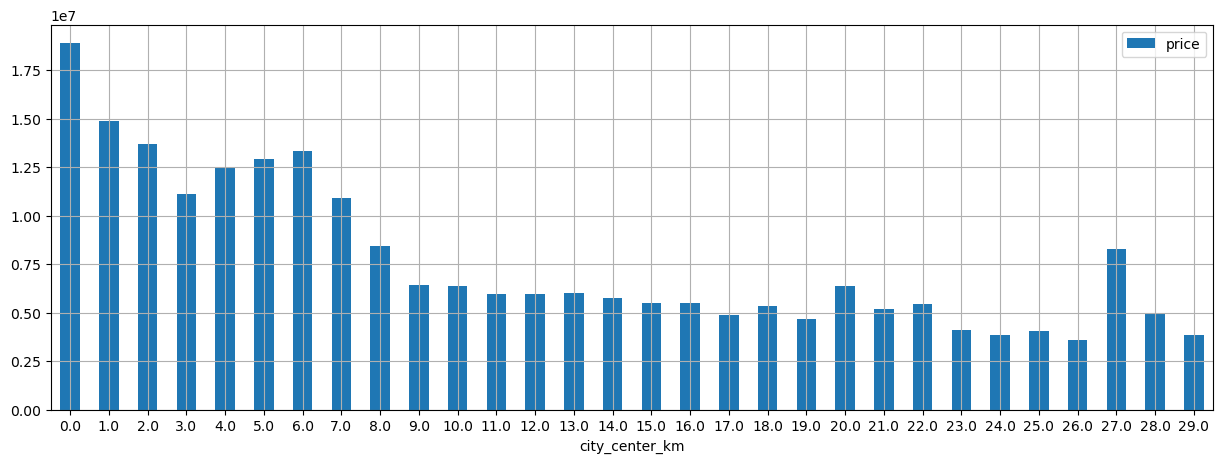

In [177]:
# построим график bar
cost_km.plot(y='price', kind='bar', rot=0, figsize=(15, 5), grid=True)
plt.show()

Видим, что цена квартир постепенно уменьшается при удалении от центра. Что логично.

Квартиры на удалении не более 1 км от центра Петербурга самые дорогие. Цена на квартиры при выходе из этой зоны резко снижается.

Есть 2 отклонения. На 3 км цена немного уменьшается от нормы на 1 млн, а на 27 км цена больше на 2.5 млн от нормы. 

Возможно на 3 км район считается неблагоприятным в отличии от окрестных районов. А на 27 км наоборот, район считается благоприятным в отличии от окрестных районов.

**Вывод:** 
1. Были изучены и описаны параметры. В основном у параметров скошенное вправо распределение.

2. Время продажи квартир было изучено. Быстрыми продажи можно считать до 231 дня, а необычно долгими - свыше 232 дней.

3. Были изучены факторы, которые влияют на стоимость квартиры. На стоимость объекта сильно влияет общая площадь и жилая площадь квартиры, меньше влияет площадь кухни и количество комнат. На стоимость квартиры влияние не оказывает день, месяц и год объявления.

4. Была расчитана средняя цену квадратного метра в топ-10 населённых пунктах с наибольшим числом объявлений.

5. Была расчитана цена км жилья при удалении от центра Санкт-Петербурга. Цена квартир постепенно уменьшается при удалении от центра.

### Общий вывод

**Общий вывод:**
Мы провели исследование продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Датафрейм был обработан, мы заполнили пропуски, удалили дубликаты и обработали аномальные значени. После подготовки данных, мы ответили на поставленные вопросы исследования. 

1. Цена квартир уменьшается постепенно при удалении от центра Санкт-Петербурга.

2. На цену квартиры влияет общая и жилая площадь, меньше влияет площадь кухни и количество комнат. На стоимость квартиры не оказывает влияния дата размещения объяления.

3. В основном квартиры продаются за 231 день (75 % продаж), но бывают продажи и более 4 лет.

**Рекомендации:**
1. Большое количество объявлений не содержит картографических данных, которые должны автоматически добавиться. Вероятно это  программная ошибка (картографические данные не были получены при размещении объявления), либо это ошибка выгрузки данных.